In [1]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import math
from sklearn.metrics import roc_auc_score,plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

# Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Dataset for Problem: Election_Data.xlsx
#### Data Ingestion: 11 marks
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

### Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

### Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

### Inference: 5 marks
1.8 Based on these predictions, what are the insights? (5 marks)

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
df=pd.read_excel("downloads/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [4]:
print("Number of rows: ",df.shape[0], "\n""Number. of columns: ",df.shape[1])

Number of rows:  1525 
Number. of columns:  9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.describe()

age  economic.cond.national  economic.cond.household  \
count  1517.000000             1517.000000              1517.000000   
mean     54.241266                3.245221                 3.137772   
std      15.701741                0.881792                 0.931069   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  
count  1517.000000  1517.000000  1517.000000          1517.000000  
mean      3.335531     2.749506     6.740277             1.540541  
std       1.174772     1.232479     3.299043             1.084417  
min       1.000000     1.000000     1.000000             0.000000  
25%       2.000000     2.000000     4.000000             0.000000  
50%       4.000000     2.000000     6.000000             2.000000  
75%       4.000000     4.000000    10.000000             2.000000  
max       5.000000     5.000000    11.000000             3.000000

In [11]:
df.describe(include='object')

vote  gender
count     1517    1517
unique       2       2
top     Labour  female
freq      1057     808

In [12]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

AGE :  70
91     1
93     1
90     1
92     2
87     3
      ..
46    37
47    38
35    38
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64




In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [14]:
print("Skewness values"'\n',df.skew())

Skewness values
 age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64


In [15]:
df.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [16]:
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge": "political_knowledge"},inplace = True)

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

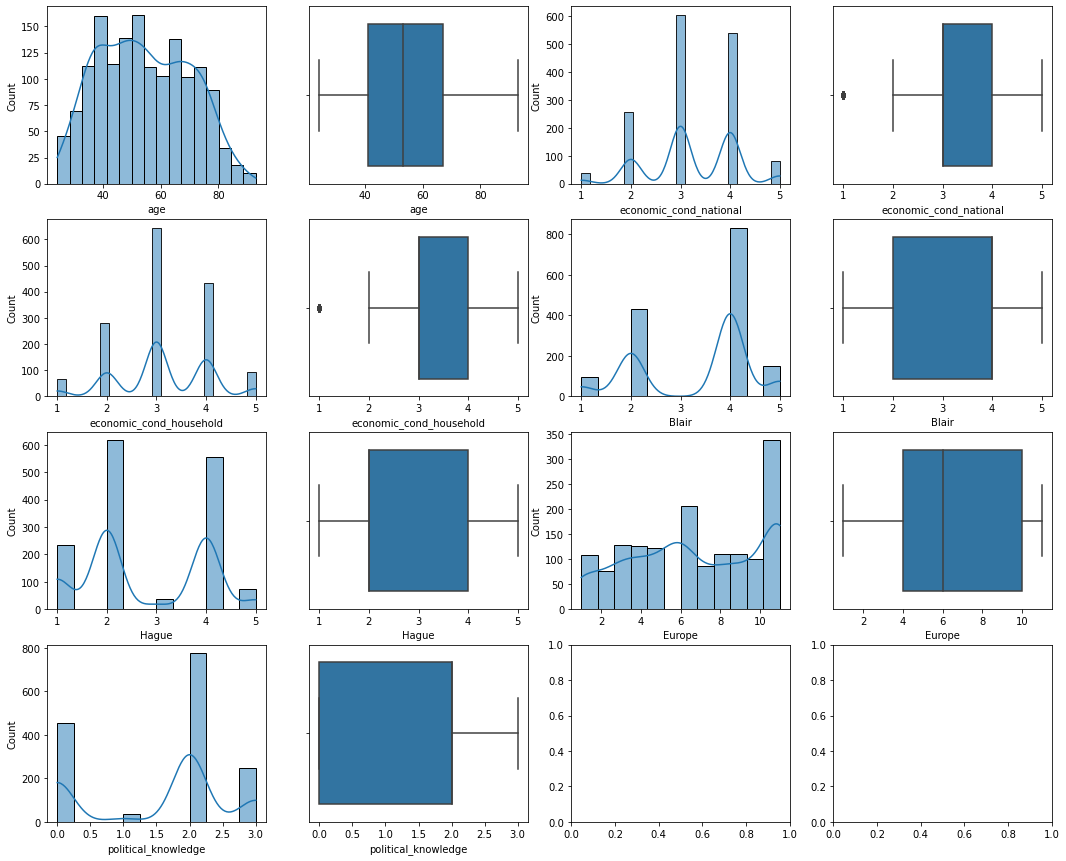

In [17]:
fig,axes = plt.subplots(nrows = 4, ncols = 4)
fig.set_size_inches(18,15)
sns.histplot(df['age'], kde = True, ax = axes[0][0]);
sns.boxplot(x= 'age', data = df, ax = axes[0][1]);
sns.histplot(df['economic_cond_national'], kde= True, ax =axes[0][2]);
sns.boxplot(x = 'economic_cond_national', data = df, ax =axes[0][3]);
sns.histplot(df['economic_cond_household'], kde=True, ax= axes[1][0]);
sns.boxplot(x = 'economic_cond_household',data = df, ax= axes[1][1]);
sns.histplot(df['Blair'], kde=True, ax= axes[1][2]);
sns.boxplot(x = 'Blair',data = df, ax= axes[1][3]);
sns.histplot(df['Hague'], kde=True, ax= axes[2][0]);
sns.boxplot(x = 'Hague',data = df, ax= axes[2][1]);
sns.histplot(df['Europe'], kde=True, ax= axes[2][2]);
sns.boxplot(x = 'Europe',data = df, ax= axes[2][3]);
sns.histplot(df['political_knowledge'], kde=True, ax= axes[3][0]);
sns.boxplot(x = 'political_knowledge',data = df, ax= axes[3][1]);

Here, we have two variables with outliers but since these are which are numeric but present us a position which is from 1 to 5.
1 is for worst and 5 is for excellent. These rating gives us a idea of the economic condition of both national and household income so we are not going to change or treat it otherwise data will be lost, and losing data is not good for us as it is a election pole we need as much data as we can so that we get good accuracy.

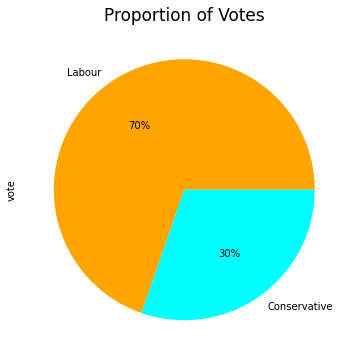

In [18]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);

Here, we can see proportion of votes by our two clases in our target variable.

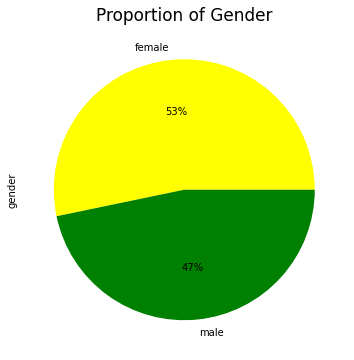

In [19]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

ere, we can see total proportion of Male and female who voted in this election.
Male : 47%
Female : 53%
Female population is more than male one.


<Figure size 432x432 with 0 Axes>

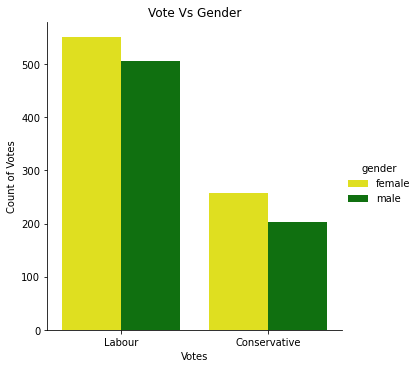

In [20]:
plt.figure(figsize=(6,6))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

Here, we can see whose count of vote is more in the given two clases according to the gender. So, here we can see female are more in in both the variable and most of the population is coming or have given vote are from labour class.

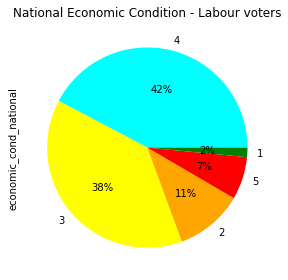

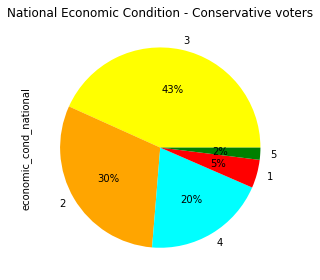

In [21]:
plt.figure(figsize=(4,4))
colors = ['cyan','yellow','orange','red','green']
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
plt.tight_layout()
plt.figure(figsize=(4,4))
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.tight_layout();

Here, we can see the proportion of votes coming from the target variable according to the given ratings in our National Economic Condition variable here we can see that from labour class which have a rating of 4 has the highest proportion of voters coming from there and in Conservative class it’s 43% which have a rating of 3.These rating tell us about the economic condition. 1 = Worst, 5 = Excellent economic condition.

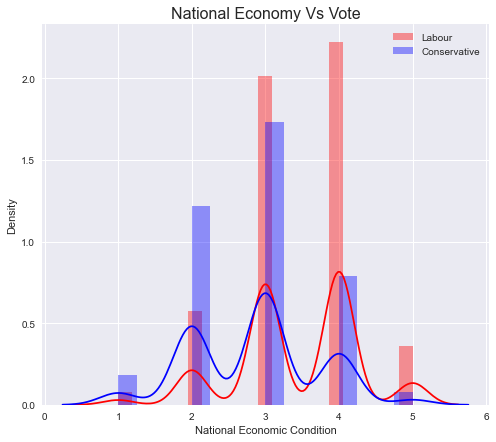

In [22]:
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=16)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
plt.show();

Here, we can see the votes from the given classes with respect to national economic condition.

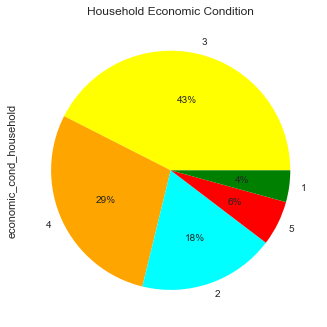

In [23]:
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

Here, we can see household economic conditions with respect to ratings.

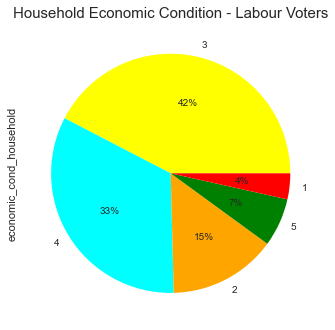

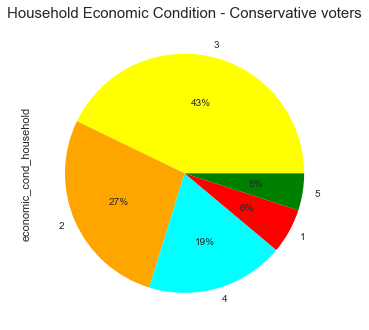

In [24]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters',fontsize=15)
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters',fontsize=15)
plt.show()

Here, we can see the proportion of votes coming from the target variable according to the given ratings in our Household Economic Condition variable here we can see that from labour class which have a rating of 3 has the highest proportion of voters coming from there and in Conservative class it’s 43% which have a rating of 3.These rating tell us about the economic condition. 1 = Worst, 5 = Excellent economic condition.

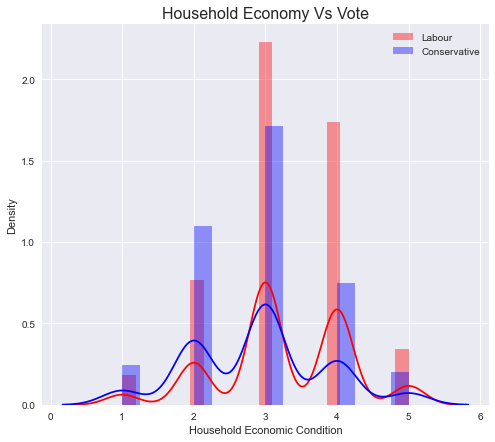

In [25]:
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour'].economic_cond_household, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household, label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=16)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
plt.show();

Here, we can see the votes from the given classes with respect to Household economic condition. Labour class having the most number of proportion as well as votes too in comparision to conservative class.

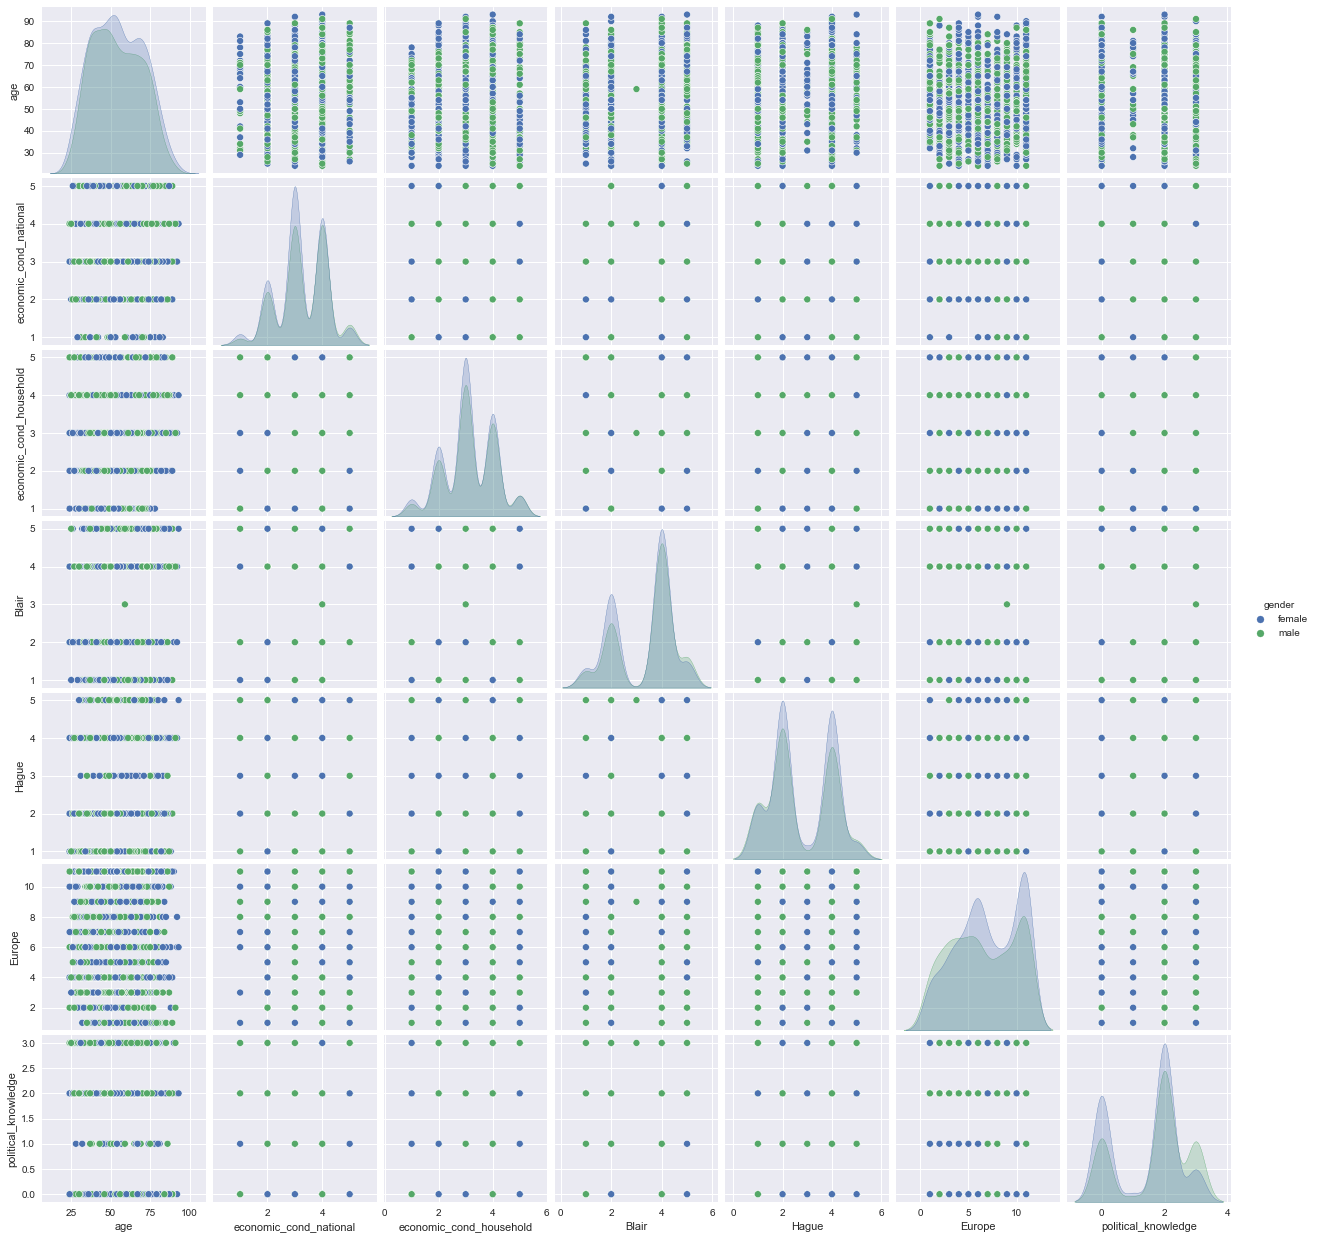

In [26]:
sns.pairplot(df,diag_kind='kde',hue='gender');

we doesnt have much correlation between variables.

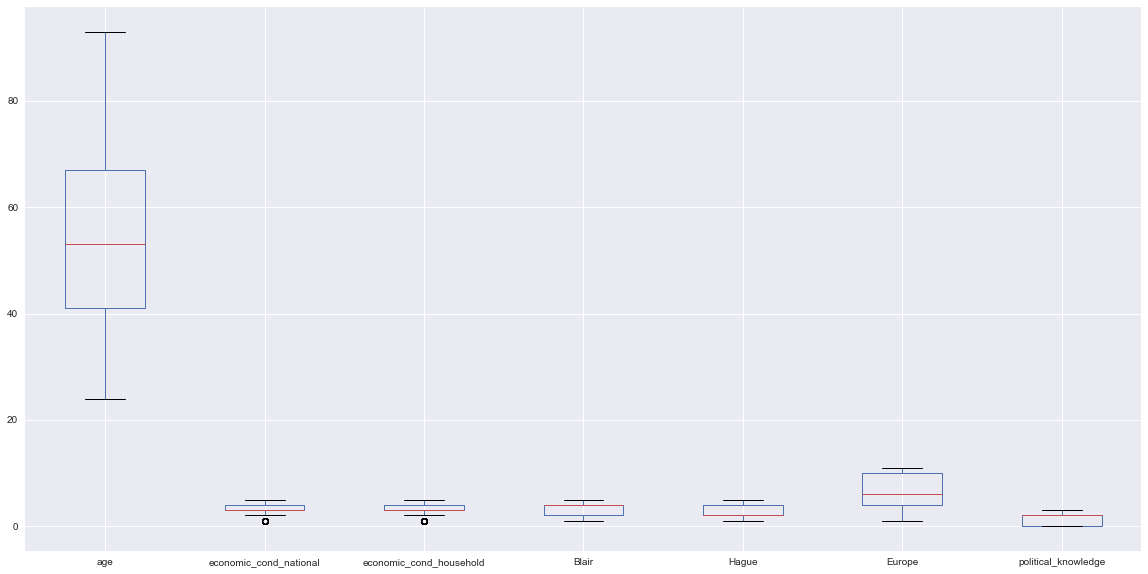

In [27]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

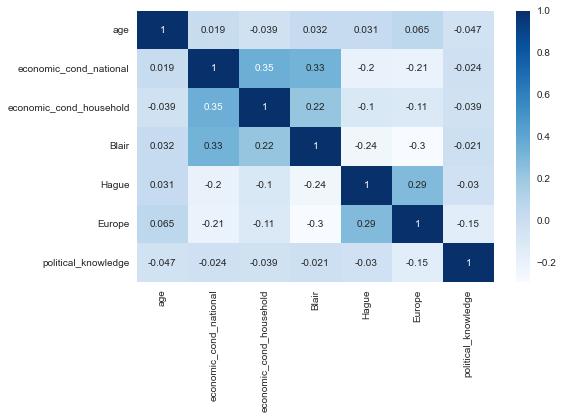

In [28]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True,cmap="Blues")
plt.show();

Collinearity is very low.

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [29]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge']


In [30]:
df =pd.get_dummies(df, columns=cat,drop_first=True)
df.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political_knowledge  vote_Labour  gender_male  
0                    2            1            0  
1                    2            1            1  
2                    2            1            1  
3                    0            1            0  
4                    2            1            1

In [31]:
df.rename(columns = {"vote_Labour": "Conservative _Labour", "gender_male": "Male_Female"},inplace = True)

In [32]:
df.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political_knowledge  Conservative _Labour  Male_Female  
0                    2                     1            0  
1                    2                     1            1  
2                    2                     1            1  
3                    0                     1            0  
4                    2                     1            1

1 = Labour & 0 = Conservative

0 = Female & 1 = Male

In [33]:
df['Conservative _Labour'] = df['Conservative _Labour'].astype('int64')
df['Male_Female'] = df['Male_Female'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic_cond_national   1517 non-null   int64
 2   economic_cond_household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political_knowledge      1517 non-null   int64
 7   Conservative _Labour     1517 non-null   int64
 8   Male_Female              1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [35]:
# Copy all the predictor variables into X dataframe
X = df.drop('Conservative _Labour', axis=1)
# Copy target into the y dataframe.  
y = df['Conservative _Labour']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=1)

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

# LinearDiscriminantAnalysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [39]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [40]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [41]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [42]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [43]:
LDA_train_met1,LDA_train_accu, LDA_train_precision, LDA_train_recall, LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj, LDA_train_precision_maj, LDA_train_recall_maj, LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.83
LDA_train_precision  0.74
LDA_train_recall  0.65
LDA_train_f1  0.69


In [44]:
LDA_train_met1

precision    recall  f1-score      support
0              0.743494  0.651466  0.694444   307.000000
1              0.864899  0.908488  0.886158   754.000000
accuracy       0.834119  0.834119  0.834119     0.834119
macro avg      0.804197  0.779977  0.790301  1061.000000
weighted avg   0.829771  0.834119  0.830686  1061.000000

In [45]:
LDA_test_met1,LDA_test_accu, LDA_test_precision, LDA_test_recall, LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj, LDA_test_precision_maj, LDA_test_recall_maj, LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.83
LDA_test_precision  0.77
LDA_test_recall  0.73
LDA_test_f1  0.74


In [46]:
LDA_test_met1

precision    recall  f1-score     support
0              0.765517  0.725490  0.744966  153.000000
1              0.864952  0.887789  0.876221  303.000000
accuracy       0.833333  0.833333  0.833333    0.833333
macro avg      0.815235  0.806639  0.810594  456.000000
weighted avg   0.831589  0.833333  0.832182  456.000000

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [48]:
## Performance Matrix on train data set
y_train_predict1 = log.predict(X_train)
model_score = log.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict1))
print(metrics.classification_report(y_train, y_train_predict1))

0.8350612629594723
[[199 108]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [49]:
## Performance Matrix on test data set
y_test_predict1 = log.predict(X_test)
model_score = log.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.8245614035087719
[[110  43]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [50]:
log_train_met1,log_train_accu, log_train_precision, log_train_recall, log_train_f1 = performance_matrices(log, X_train, y_train, y_train_predict1)
log_train_met_maj1,log_train_accu_maj, log_train_precision_maj, log_train_recall_maj, log_train_f1_maj = performance_matrices_maj(log, X_train, y_train, y_train_predict1)
print ('log_train_accu ',log_train_accu)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_accu  0.84
log_train_precision  0.75
log_train_recall  0.65
log_train_f1  0.69


In [51]:
log_train_met1

precision    recall  f1-score      support
0              0.748120  0.648208  0.694590   307.000000
1              0.864151  0.911141  0.887024   754.000000
accuracy       0.835061  0.835061  0.835061     0.835061
macro avg      0.806136  0.779675  0.790807  1061.000000
weighted avg   0.830578  0.835061  0.831343  1061.000000

In [52]:
log_test_met1,log_test_accu, log_test_precision, log_test_recall, log_test_f1 = performance_matrices(log, X_test, y_test, y_test_predict1)
log_test_met_maj1,log_test_accu_maj, log_test_precision_maj, log_test_recall_maj, log_test_f1_maj = performance_matrices_maj(log, X_test, y_test, y_test_predict1)
print ('log_test_accu ',log_test_accu)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_accu  0.82
log_test_precision  0.75
log_test_recall  0.72
log_test_f1  0.73


In [53]:
log_test_met1

precision    recall  f1-score     support
0              0.748299  0.718954  0.733333  153.000000
1              0.860841  0.877888  0.869281  303.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.804570  0.798421  0.801307  456.000000
weighted avg   0.823081  0.824561  0.823667  456.000000

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# KNN_model

In [54]:
from scipy.stats import zscore
# Copy all the predictor variables into X dataframe
Xk = df.drop('Conservative _Labour', axis=1)
# Copy target into the y dataframe.  
Yk= df['Conservative _Labour']
Xk.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political_knowledge  Male_Female  
0                    2            0  
1                    2            1  
2                    2            1  
3                    0            0  
4                    2            1

In [55]:
XScaled  = Xk.apply(zscore) 

XScaled.head()

age  economic_cond_national  economic_cond_household     Blair  \
0 -0.716161               -0.278185                -0.148020  0.565802   
1 -1.162118                0.856242                 0.926367  0.565802   
2 -1.225827                0.856242                 0.926367  1.417312   
3 -1.926617                0.856242                -1.222408 -1.137217   
4 -0.843577               -1.412613                -1.222408 -1.988727   

      Hague    Europe  political_knowledge  Male_Female  
0 -1.419969 -1.437338             0.423832    -0.936736  
1  1.014951 -0.527684             0.423832     1.067536  
2 -0.608329 -1.134120             0.423832     1.067536  
3 -1.419969 -0.830902            -1.421084    -0.936736  
4 -1.419969 -0.224465             0.423832     1.067536

In [56]:
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(XScaled, Yk, test_size=0.30, random_state=1)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(Xk_train,Yk_train)

KNeighborsClassifier()

In [58]:
## Performance Matrix on train data set
Yk_train_predict2 = KNN_model.predict(Xk_train)
model_score = KNN_model.score(Xk_train, Yk_train)
print(model_score)
print(metrics.confusion_matrix(Yk_train, Yk_train_predict2))
print(metrics.classification_report(Yk_train, Yk_train_predict2))

0.8557964184731386
[[218  89]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [59]:
## Performance Matrix on test data set
Yk_test_predict2 = KNN_model.predict(Xk_test)
model_score = KNN_model.score(Xk_test, Yk_test)
print(model_score)
print(metrics.confusion_matrix(Yk_test, Yk_test_predict2))
print(metrics.classification_report(Yk_test, Yk_test_predict2))

0.8245614035087719
[[105  48]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [60]:
KNN_train_met1,KNN_train_accu, KNN_train_precision, KNN_train_recall, KNN_train_f1 = performance_matrices(KNN_model, Xk_train, Yk_train, Yk_train_predict2)
KNN_train_met_maj1,KNN_train_accu_maj, KNN_train_precision_maj, KNN_train_recall_maj, KNN_train_f1_maj = performance_matrices_maj(KNN_model, Xk_train, Yk_train, Yk_train_predict2)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.86
KNN_train_precision  0.77
KNN_train_recall  0.71
KNN_train_f1  0.74


In [61]:
KNN_train_met1

precision    recall  f1-score      support
0              0.773050  0.710098  0.740238   307.000000
1              0.885751  0.915119  0.900196   754.000000
accuracy       0.855796  0.855796  0.855796     0.855796
macro avg      0.829400  0.812609  0.820217  1061.000000
weighted avg   0.853141  0.855796  0.853912  1061.000000

In [62]:
KNN_test_met1,KNN_test_accu, KNN_test_precision, KNN_test_recall, KNN_test_f1 = performance_matrices(KNN_model, Xk_test, Yk_test, Yk_test_predict2)
KNN_test_met_maj1,KNN_test_accu_maj, KNN_test_precision_maj, KNN_test_recall_maj, KNN_test_f1_maj = performance_matrices_maj(LDA_model, Xk_test, Yk_test, Yk_test_predict2)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.82
KNN_test_precision  0.77
KNN_test_recall  0.69
KNN_test_f1  0.72


In [63]:
KNN_test_met1

precision    recall  f1-score     support
0              0.766423  0.686275  0.724138  153.000000
1              0.849530  0.894389  0.871383  303.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.807977  0.790332  0.797760  456.000000
weighted avg   0.821645  0.824561  0.821978  456.000000

# Naive Bayes Model

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [65]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [66]:
## Performance Matrix on train data set
y_train_predict3 = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict3))
print(metrics.classification_report(y_train, y_train_predict3))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [67]:
## Performance Matrix on test data set
y_test_predict3 = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict3))
print(metrics.classification_report(y_test, y_test_predict3))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [68]:
NB_train_met1,NB_train_accu, NB_train_precision, NB_train_recall, NB_train_f1 = performance_matrices(NB_model, X_train, y_train, y_train_predict3)
NB_train_met_maj1,NB_train_accu_maj, NB_train_precision_maj, NB_train_recall_maj, log_train_f1_maj = performance_matrices_maj(NB_model, X_train, y_train, y_train_predict3)
print ('NB_train_accu ',NB_train_accu)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_accu  0.84
NB_train_precision  0.73
NB_train_recall  0.69
NB_train_f1  0.71


In [69]:
NB_train_met1

precision    recall  f1-score      support
0              0.727586  0.687296  0.706868   307.000000
1              0.875486  0.895225  0.885246   754.000000
accuracy       0.835061  0.835061  0.835061     0.835061
macro avg      0.801536  0.791261  0.796057  1061.000000
weighted avg   0.832692  0.835061  0.833632  1061.000000

In [70]:
NB_test_met1,NB_test_accu, NB_test_precision, NB_test_recall, NB_test_f1 = performance_matrices(NB_model, X_test, y_test, y_test_predict3)
NB_test_met_maj1,NB_test_accu_maj, NB_test_precision_maj, NB_test_recall_maj, NB_test_f1_maj = performance_matrices_maj(NB_model, X_test, y_test, y_test_predict3)
print ('NB_test_accu ',NB_test_accu)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_accu  0.82
NB_test_precision  0.74
NB_test_recall  0.73
NB_test_f1  0.73


In [71]:
NB_test_met1

precision    recall  f1-score     support
0              0.736842  0.732026  0.734426  153.000000
1              0.865132  0.867987  0.866557  303.000000
accuracy       0.822368  0.822368  0.822368    0.822368
macro avg      0.800987  0.800006  0.800492  456.000000
weighted avg   0.822087  0.822368  0.822224  456.000000

# SVM

In [72]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [73]:
ytrain_predict4 = SVM_model.predict(X_train)
ytest_predict4 = SVM_model.predict(X_test)

In [74]:
SVM_train_met1,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict4)
SVM_train_met_maj1,SVM_train_accu_maj,SVM_train_precision_maj,SVM_train_recall_maj,SVM_train_f1_maj = performance_matrices_maj(SVM_model, X_train, y_train, ytrain_predict4)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_accu  0.73
SVM_train_precision  0.9
SVM_train_recall  0.08
SVM_train_f1  0.15


In [75]:
SVM_test_met1,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict4)
SVM_test_met_maj1,SVM_test_accu_maj,SVM_test_precision_maj,SVM_test_recall_maj,SVM_test_f1_maj = performance_matrices_maj(SVM_model, X_test, y_test, ytest_predict4)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.69
SVM_test_precision  0.86
SVM_test_recall  0.08
SVM_test_f1  0.14


In [76]:
SVM_train_met1

precision    recall  f1-score      support
0              0.896552  0.084691  0.154762   307.000000
1              0.727713  0.996021  0.840985   754.000000
accuracy       0.732328  0.732328  0.732328     0.732328
macro avg      0.812132  0.540356  0.497874  1061.000000
weighted avg   0.776567  0.732328  0.642427  1061.000000

In [77]:
SVM_test_met1

precision    recall  f1-score     support
0              0.857143  0.078431  0.143713  153.000000
1              0.680995  0.993399  0.808054  303.000000
accuracy       0.686404  0.686404  0.686404    0.686404
macro avg      0.769069  0.535915  0.475883  456.000000
weighted avg   0.740098  0.686404  0.585150  456.000000

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [78]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [79]:
df['Conservative _Labour'].value_counts()

1    1057
0     460
Name: Conservative _Labour, dtype: int64

## Model Tuning

In [80]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [81]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1061, 8)
After SMOTE:  (1508, 8)


### Linear Regression with SMOTE

In [82]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [83]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [84]:
logit_train_met2,logit_res_train_accu,logit_res_train_precision,logit_res_train_recall,logit_res_train_f1 = performance_matrices(logit_res_model, X_train_res, y_train_res, ytrain_predict)
print ('logit_res_train_accu ',logit_res_train_accu)
print ('logit_res_train_precision ',logit_res_train_precision)
print ('logit_res_train_recall ',logit_res_train_recall)
print ('logit_res_train_f1 ',logit_res_train_f1)

logit_res_train_accu  0.84
logit_res_train_precision  0.83
logit_res_train_recall  0.85
logit_res_train_f1  0.84


In [85]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.8
logit_res_test_precision  0.66
logit_res_test_recall  0.8
logit_res_test_f1  0.73


In [86]:
logit_train_met2

precision    recall  f1-score      support
0              0.828794  0.847480  0.838033   754.000000
1              0.843962  0.824934  0.834339   754.000000
accuracy       0.836207  0.836207  0.836207     0.836207
macro avg      0.836378  0.836207  0.836186  1508.000000
weighted avg   0.836378  0.836207  0.836186  1508.000000

In [87]:
logit_test_met2

precision    recall  f1-score     support
0              0.664865  0.803922  0.727811  153.000000
1              0.889299  0.795380  0.839721  303.000000
accuracy       0.798246  0.798246  0.798246    0.798246
macro avg      0.777082  0.799651  0.783766  456.000000
weighted avg   0.813995  0.798246  0.802172  456.000000

# LDA with SMOTE

In [88]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [89]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [90]:
LDA_train_met2,LDA_res_train_accu,LDA_res_train_precision,LDA_res_train_recall,LDA_res_train_f1 = performance_matrices(LDA_res_model, X_train_res, y_train_res, ytrain_predict)
print ('LDA_res_train_accu ',logit_res_train_accu)
print ('LDA_res_train_precision ',logit_res_train_precision)
print ('LDA_res_train_recall ',logit_res_train_recall)
print ('LDA_res_train_f1 ',logit_res_train_f1)

LDA_res_train_accu  0.84
LDA_res_train_precision  0.83
LDA_res_train_recall  0.85
LDA_res_train_f1  0.84


In [91]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.8
LDA_res_test_precision  0.67
LDA_res_test_recall  0.82
LDA_res_test_f1  0.74


In [92]:
LDA_train_met2

precision    recall  f1-score      support
0              0.829237  0.850133  0.839555   754.000000
1              0.846259  0.824934  0.835460   754.000000
accuracy       0.837533  0.837533  0.837533     0.837533
macro avg      0.837748  0.837533  0.837507  1508.000000
weighted avg   0.837748  0.837533  0.837507  1508.000000

In [93]:
LDA_test_met2

precision    recall  f1-score     support
0              0.666667  0.823529  0.736842  153.000000
1              0.898876  0.792079  0.842105  303.000000
accuracy       0.802632  0.802632  0.802632    0.802632
macro avg      0.782772  0.807804  0.789474  456.000000
weighted avg   0.820964  0.802632  0.806787  456.000000

# KNN with SMOTE

In [94]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [95]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [96]:
KNN_train_met2,KNN_res_train_accu,KNN_res_train_precision,KNN_res_train_recall,KNN_res_train_f1 = performance_matrices(KNN_res_model, X_train_res, y_train_res, ytrain_predict)
print ('KNN_res_train_accu ',logit_res_train_accu)
print ('KNN_res_train_precision ',logit_res_train_precision)
print ('KNN_res_train_recall ',logit_res_train_recall)
print ('KNN_res_train_f1 ',logit_res_train_f1)

KNN_res_train_accu  0.84
KNN_res_train_precision  0.83
KNN_res_train_recall  0.85
KNN_res_train_f1  0.84


In [97]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.8
KNN_res_test_precision  0.67
KNN_res_test_recall  0.8
KNN_res_test_f1  0.73


In [98]:
KNN_train_met2

precision    recall  f1-score      support
0              0.838973  0.953581  0.892613   754.000000
1              0.946237  0.816976  0.876868   754.000000
accuracy       0.885279  0.885279  0.885279     0.885279
macro avg      0.892605  0.885279  0.884741  1508.000000
weighted avg   0.892605  0.885279  0.884741  1508.000000

In [99]:
KNN_test_met2

precision    recall  f1-score     support
0              0.672131  0.803922  0.732143  153.000000
1              0.890110  0.801980  0.843750  303.000000
accuracy       0.802632  0.802632  0.802632    0.802632
macro avg      0.781121  0.802951  0.787946  456.000000
weighted avg   0.816972  0.802632  0.806303  456.000000

# SVM with SMOTE

In [100]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [101]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [102]:
svm_train_met2,svm_res_train_accu,svm_res_train_precision,svm_res_train_recall,svm_res_train_f1 = performance_matrices(SVM_res_model, X_train_res, y_train_res, ytrain_predict)
print ('svm_res_train_accu ',svm_res_train_accu)
print ('svm_res_train_precision ',svm_res_train_precision)
print ('svm_res_train_recall ',svm_res_train_recall)
print ('svm_res_train_f1 ',svm_res_train_f1)

svm_res_train_accu  0.8
svm_res_train_precision  0.79
svm_res_train_recall  0.81
svm_res_train_f1  0.8


In [103]:
SVM_test_met2,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.78
SVM_res_test_precision  0.64
SVM_res_test_recall  0.82
SVM_res_test_f1  0.72


In [104]:
svm_train_met2

precision    recall  f1-score      support
0              0.792746  0.811671  0.802097   754.000000
1              0.807065  0.787798  0.797315   754.000000
accuracy       0.799735  0.799735  0.799735     0.799735
macro avg      0.799906  0.799735  0.799706  1508.000000
weighted avg   0.799906  0.799735  0.799706  1508.000000

In [105]:
SVM_test_met2

precision    recall  f1-score     support
0              0.637755  0.816993  0.716332  153.000000
1              0.892308  0.765677  0.824156  303.000000
accuracy       0.782895  0.782895  0.782895    0.782895
macro avg      0.765031  0.791335  0.770244  456.000000
weighted avg   0.806899  0.782895  0.787979  456.000000

# Naive Bayes

In [106]:
NB_res_model =GaussianNB()
NB_res_model.fit(X_train_res, y_train_res)

GaussianNB()

In [107]:
ytrain_predict = NB_res_model.predict(X_train_res)
ytest_predict = NB_res_model.predict(X_test)

In [108]:
NB_train_met2,NB_res_train_accu,NB_res_train_precision,NB_res_train_recall,NB_res_train_f1 = performance_matrices(NB_res_model, X_train_res, y_train_res, ytrain_predict)
print ('NB_res_train_accu ',NB_res_train_accu)
print ('NB_res_train_precision ',NB_res_train_precision)
print ('NB_res_train_recall ',NB_res_train_recall)
print ('NB_res_train_f1 ',NB_res_train_f1)

NB_res_train_accu  0.83
NB_res_train_precision  0.83
NB_res_train_recall  0.83
NB_res_train_f1  0.83


In [109]:
NB_test_met2,NB_res_test_accu,NB_res_test_precision,NB_res_test_recall,NB_res_test_f1 = performance_matrices(NB_res_model, X_test, y_test, ytest_predict)
print ('NB_res_test_accu ',NB_res_test_accu)
print ('NB_res_test_precision ',NB_res_test_precision)
print ('NB_res_test_recall ',NB_res_test_recall)
print ('NB_res_test_f1 ',NB_res_test_f1)

NB_res_test_accu  0.81
NB_res_test_precision  0.69
NB_res_test_recall  0.78
NB_res_test_f1  0.73


In [110]:
NB_train_met2

precision    recall  f1-score      support
0              0.832891  0.832891  0.832891   754.000000
1              0.832891  0.832891  0.832891   754.000000
accuracy       0.832891  0.832891  0.832891     0.832891
macro avg      0.832891  0.832891  0.832891  1508.000000
weighted avg   0.832891  0.832891  0.832891  1508.000000

In [111]:
NB_test_met2

precision    recall  f1-score     support
0              0.687861  0.777778  0.730061  153.000000
1              0.879859  0.821782  0.849829  303.000000
accuracy       0.807018  0.807018  0.807018    0.807018
macro avg      0.783860  0.799780  0.789945  456.000000
weighted avg   0.815438  0.807018  0.809644  456.000000

# Hyperparameter tuning using GridsearchCV
## Logistic Regression with GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10,n_jobs=-1)
#logit_model3 = LogisticRegression(C = 1.438449888287663, penalty = 'l2', solver = 'newton-cg', class_weight = class_weight)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.

C in [100, 10, 1.0, 0.1, 0.01]

In [113]:
print ("Best Parametres from",logit_model3.best_estimator_)

Best Parametres from LogisticRegression(C=0.0379269019073225, class_weight={0: 2, 1: 1},
                   solver='newton-cg')


In [114]:
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [115]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.83
logit_train_precision  0.68
logit_train_recall  0.79
logit_train_f1  0.73


In [116]:
logit_train_met3

precision    recall  f1-score      support
0              0.676966  0.785016  0.726998   307.000000
1              0.906383  0.847480  0.875942   754.000000
accuracy       0.829406  0.829406  0.829406     0.829406
macro avg      0.791675  0.816248  0.801470  1061.000000
weighted avg   0.840001  0.829406  0.832846  1061.000000

In [117]:
log_train_met1 #to compare with 1st iteration

precision    recall  f1-score      support
0              0.748120  0.648208  0.694590   307.000000
1              0.864151  0.911141  0.887024   754.000000
accuracy       0.835061  0.835061  0.835061     0.835061
macro avg      0.806136  0.779675  0.790807  1061.000000
weighted avg   0.830578  0.835061  0.831343  1061.000000

In [118]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu3 ',logit_test_accu3)
print ('logit_test_precision3 ',logit_test_precision3)
print ('logit_test_recall3 ',logit_test_recall3)
print ('logit_test_f13 ',logit_test_f13)

logit_test_accu3  0.82
logit_test_precision3  0.7
logit_test_recall3  0.81
logit_test_f13  0.75


In [119]:
logit_test_met3

precision    recall  f1-score     support
0              0.696629  0.810458  0.749245  153.000000
1              0.895683  0.821782  0.857143  303.000000
accuracy       0.817982  0.817982  0.817982    0.817982
macro avg      0.796156  0.816120  0.803194  456.000000
weighted avg   0.828896  0.817982  0.820940  456.000000

In [120]:
log_test_met1

precision    recall  f1-score     support
0              0.748299  0.718954  0.733333  153.000000
1              0.860841  0.877888  0.869281  303.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.804570  0.798421  0.801307  456.000000
weighted avg   0.823081  0.824561  0.823667  456.000000

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       307
           1       0.91      0.85      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.82      0.80      1061
weighted avg       0.84      0.83      0.83      1061
 



<Figure size 720x432 with 0 Axes>

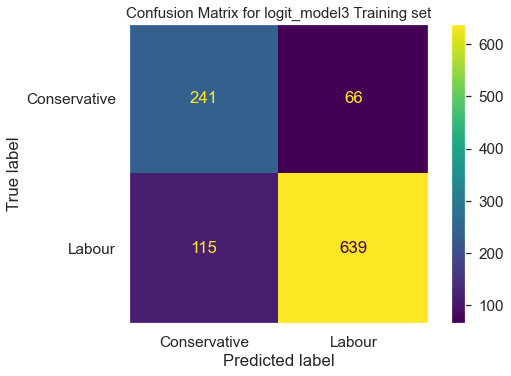

In [121]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for logit_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

True Positives (TP): The model predicted positive and the actual label is positive
True Negative (TN): The model predicted negative and the actual label is negative
False Positive (FP): The model predicted positive and the actual label was negative
False Negative (FN): The model predicted  negative and the actual label was positive


By this we can understand that here the model predicted that these 115 votes was for conservative class but it was for labour class and also the 66 votes were predicted for the labour class but the vote was for the conservative class and here we can see that most amount of vote is for labour class here and for conservative class its very less so here people are choosing labour class the most.This way of prediction will be folowed for all the models to gather insights.

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       153
           1       0.90      0.82      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.82      0.80       456
weighted avg       0.83      0.82      0.82       456
 



<Figure size 720x432 with 0 Axes>

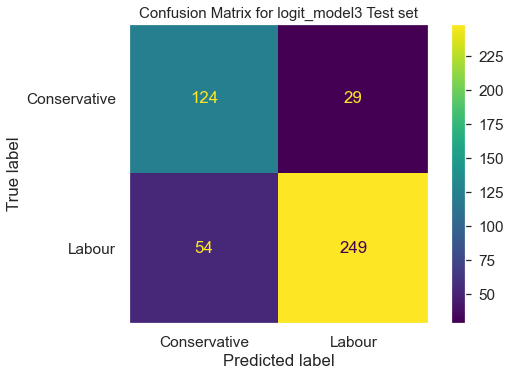

In [122]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for logit_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

In [123]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

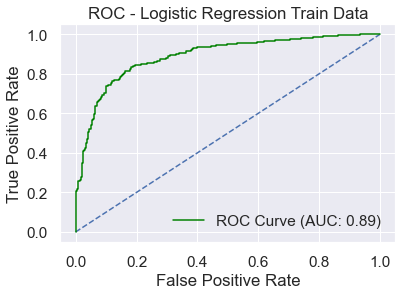

logit_train_auc 0.8897130612844417


In [124]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

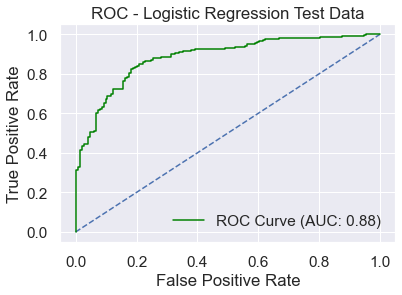

logit_test_auc 0.8836471882482366


In [125]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc3)


AUC for Training data = 0.8897130612844417
AUC for Test data = 0.8836471882482366


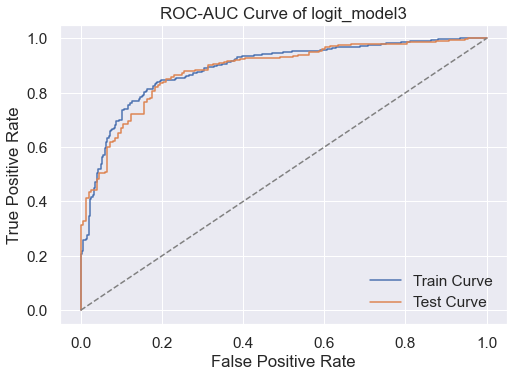

In [126]:
LR_train_predict_prob = logit_model3.predict_proba(X_train)
LR_test_predict_prob = logit_model3.predict_proba(X_test)
LR_pred_train_prob = logit_model3.predict_proba(X_train)
LR_pred_test_prob = logit_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(logit_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(logit_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of logit_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Linear Discriminant Analysis with GridsearchCV

In [127]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

tol:
Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X. Dimensions whose singular values are non-significant are discarded. Only used if solver is ‘svd’.

In [128]:
print("Best Parameters from LDA ",LDA_model3.best_params_)

Best Parameters from LDA  {'solver': 'svd', 'tol': 0.0001}


In [129]:
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [130]:
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.83
LDA_train_precision  0.74
LDA_train_recall  0.65
LDA_train_f1  0.69


In [131]:
LDA_train_met3

precision    recall  f1-score      support
0              0.743494  0.651466  0.694444   307.000000
1              0.864899  0.908488  0.886158   754.000000
accuracy       0.834119  0.834119  0.834119     0.834119
macro avg      0.804197  0.779977  0.790301  1061.000000
weighted avg   0.829771  0.834119  0.830686  1061.000000

In [132]:
LDA_train_met1

precision    recall  f1-score      support
0              0.743494  0.651466  0.694444   307.000000
1              0.864899  0.908488  0.886158   754.000000
accuracy       0.834119  0.834119  0.834119     0.834119
macro avg      0.804197  0.779977  0.790301  1061.000000
weighted avg   0.829771  0.834119  0.830686  1061.000000

In [133]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.83
LDA_test_precision  0.77
LDA_test_recall  0.73
LDA_test_f1  0.74


In [134]:
LDA_test_met3

precision    recall  f1-score     support
0              0.765517  0.725490  0.744966  153.000000
1              0.864952  0.887789  0.876221  303.000000
accuracy       0.833333  0.833333  0.833333    0.833333
macro avg      0.815235  0.806639  0.810594  456.000000
weighted avg   0.831589  0.833333  0.832182  456.000000

In [135]:
LDA_test_met1

precision    recall  f1-score     support
0              0.765517  0.725490  0.744966  153.000000
1              0.864952  0.887789  0.876221  303.000000
accuracy       0.833333  0.833333  0.833333    0.833333
macro avg      0.815235  0.806639  0.810594  456.000000
weighted avg   0.831589  0.833333  0.832182  456.000000

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



<Figure size 720x432 with 0 Axes>

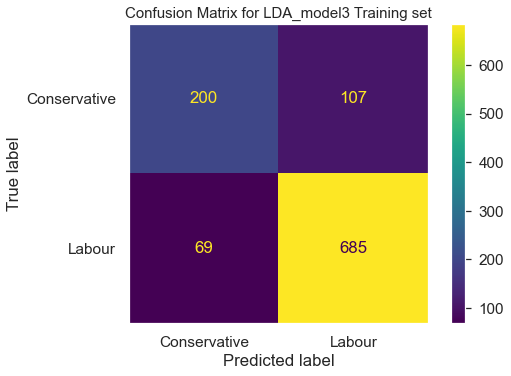

In [136]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LDA_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

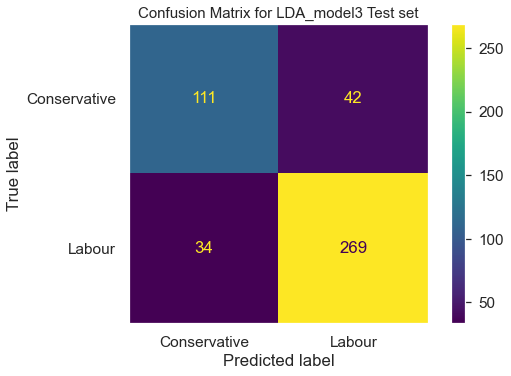

In [137]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LDA_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

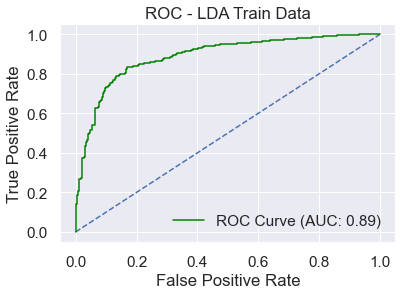

LDA_train_auc 0.8893674560865394


In [138]:
LDA_train_auc3, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model3, X_train, y_train, 'green', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc3)

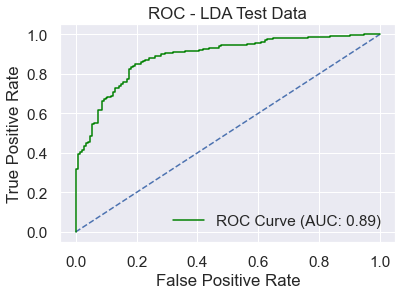

LDA_test_auc 0.8876377833861817


In [139]:
LDA_test_auc3, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model3, X_test, y_test, 'green', 'ROC - LDA Test Data')
print('LDA_test_auc', LDA_test_auc3)

AUC for Training data = 0.8893674560865394
AUC for Test data = 0.8876377833861817


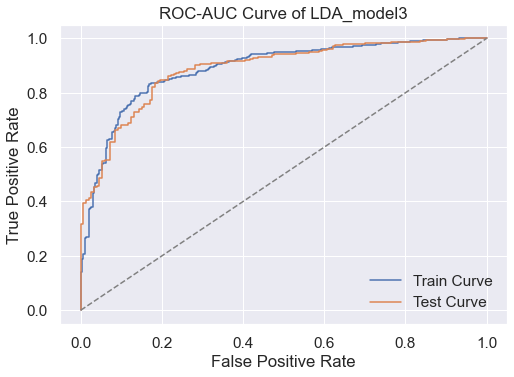

In [140]:
LR_train_predict_prob = LDA_model3.predict_proba(X_train)
LR_test_predict_prob = LDA_model3.predict_proba(X_test)
LR_pred_train_prob = LDA_model3.predict_proba(X_train)
LR_pred_test_prob = LDA_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(LDA_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(LDA_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# KNN Model with GridsearchCV

In [141]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(Xk_train, Yk_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least 1 and 21, perhaps just the odd numbers.

n_neighbors in [1 to 21]
It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]
For a fuller list see:

sklearn.neighbors.DistanceMetric API
It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

weights in [‘uniform’, ‘distance’]

In [142]:
print("Best Parameters from KNN Model",KNN_model3.best_params_)

Best Parameters from KNN Model {'metric': 'canberra', 'n_neighbors': 10, 'weights': 'uniform'}


In [143]:
ytrain_predictkn = KNN_model3.predict(Xk_train)
ytest_predictkn = KNN_model3.predict(Xk_test)

In [144]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, Xk_train, Yk_train, ytrain_predictkn)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, Xk_train, Yk_train, ytrain_predictkn)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.85
KNN_train_precision  0.73
KNN_train_recall  0.77
KNN_train_f1  0.75


In [145]:
KNN_train_met3

precision    recall  f1-score      support
0              0.730650  0.768730  0.749206   307.000000
1              0.903794  0.884615  0.894102   754.000000
accuracy       0.851084  0.851084  0.851084     0.851084
macro avg      0.817222  0.826673  0.821654  1061.000000
weighted avg   0.853695  0.851084  0.852176  1061.000000

In [146]:
KNN_train_met1

precision    recall  f1-score      support
0              0.773050  0.710098  0.740238   307.000000
1              0.885751  0.915119  0.900196   754.000000
accuracy       0.855796  0.855796  0.855796     0.855796
macro avg      0.829400  0.812609  0.820217  1061.000000
weighted avg   0.853141  0.855796  0.853912  1061.000000

In [147]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, Xk_test, Yk_test, ytest_predictkn)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, Xk_test, Yk_test, ytest_predictkn)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.82
KNN_test_precision  0.73
KNN_test_recall  0.72
KNN_test_f1  0.73


In [148]:
KNN_test_met3

precision    recall  f1-score     support
0              0.733333  0.718954  0.726073  153.000000
1              0.859477  0.867987  0.863711  303.000000
accuracy       0.817982  0.817982  0.817982    0.817982
macro avg      0.796405  0.793471  0.794892  456.000000
weighted avg   0.817153  0.817982  0.817530  456.000000

In [149]:
KNN_test_met1

precision    recall  f1-score     support
0              0.766423  0.686275  0.724138  153.000000
1              0.849530  0.894389  0.871383  303.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.807977  0.790332  0.797760  456.000000
weighted avg   0.821645  0.824561  0.821978  456.000000

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       307
           1       0.90      0.88      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.83      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 



<Figure size 720x432 with 0 Axes>

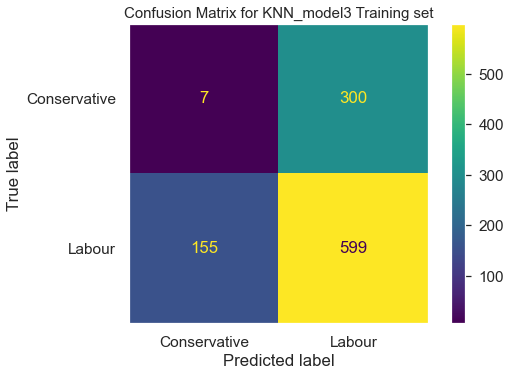

In [150]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for KNN_model3 Training set",fontsize=15)
print(classification_report(Yk_train, ytrain_predictkn),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       153
           1       0.86      0.87      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



<Figure size 720x432 with 0 Axes>

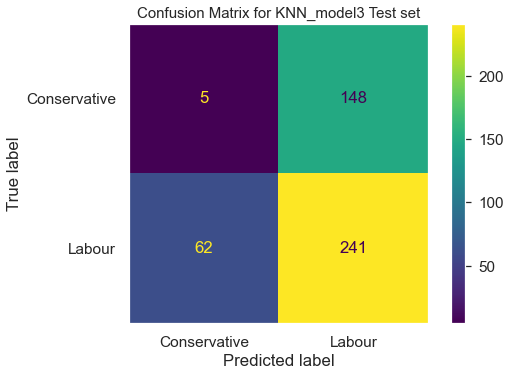

In [151]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for KNN_model3 Test set",fontsize=15)
print(classification_report(Yk_test, ytest_predictkn),'\n');
plt.grid(None)
plt.show();

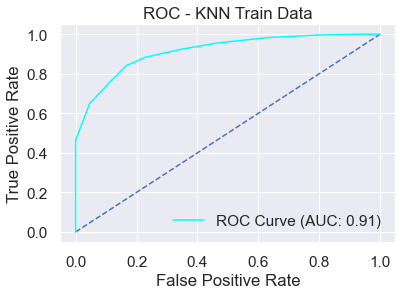

KNN_train_auc 0.9148968800490761


In [152]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, Xk_train, Yk_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

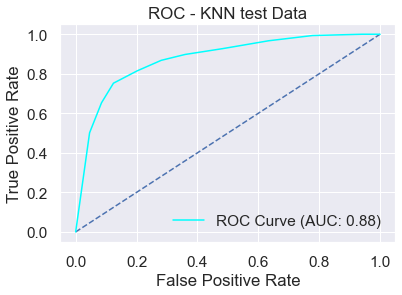

KNN_test_auc 0.8767553225910827


In [153]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, Xk_test, Yk_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

AUC for Training data = 0.9148968800490761
AUC for Test data = 0.8767553225910827


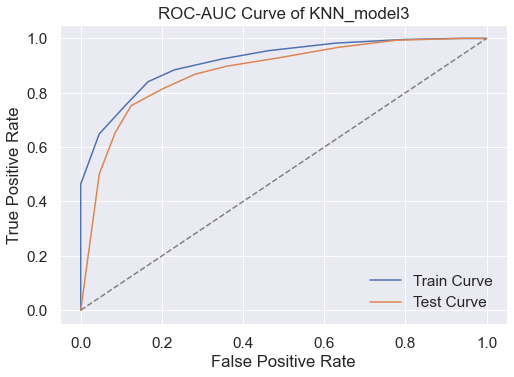

In [154]:
LR_train_predict_prob = KNN_model3.predict_proba(Xk_train)
LR_test_predict_prob = KNN_model3.predict_proba(Xk_test)
LR_pred_train_prob = KNN_model3.predict_proba(Xk_train)
LR_pred_test_prob = KNN_model3.predict_proba(Xk_test)

LR_auc_train = roc_auc_score(Yk_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(Yk_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(KNN_model3, Xk_train,Yk_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(KNN_model3, Xk_test, Yk_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of KNN_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Naive Bayes

In [155]:
NB2 = GaussianNB(priors=None, var_smoothing= 0.0)
NB2.fit(X_train,y_train)

GaussianNB(var_smoothing=0.0)

Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.

In [156]:
ytrain_predict = NB2.predict(X_train)
ytest_predict = NB2.predict(X_test)

In [157]:
NB2_train_met3,NB2_train_accu3,NB2_train_precision3,NB2_train_recall3,NB2_train_f13 = performance_matrices(NB2, X_train, y_train, ytrain_predict)
NB2_train_met_maj3,NB2_train_accu_maj3,NB2_train_precision_maj3,NB2_train_recall_maj3,NB2_train_f1_maj3 = performance_matrices_maj(NB2, X_train, y_train, ytrain_predict)
print ('NB2_train_accu ',NB2_train_accu3)
print ('NB2_train_precision ',NB2_train_precision3)
print ('NB2_train_recall ',NB2_train_recall3)
print ('NB2_train_f1 ',NB2_train_f13)

NB2_train_accu  0.84
NB2_train_precision  0.73
NB2_train_recall  0.69
NB2_train_f1  0.71


In [158]:
NB2_train_met3

precision    recall  f1-score      support
0              0.727586  0.687296  0.706868   307.000000
1              0.875486  0.895225  0.885246   754.000000
accuracy       0.835061  0.835061  0.835061     0.835061
macro avg      0.801536  0.791261  0.796057  1061.000000
weighted avg   0.832692  0.835061  0.833632  1061.000000

In [159]:
NB2_test_met3,NB2_test_accu3,NB2_test_precision3,NB2_test_recall3,NB2_test_f13 = performance_matrices(NB2, X_test, y_test, ytest_predict)
NB2_test_met_maj3,NB2_test_accu_maj3,NB2_test_precision_maj3,NB2_test_recall_maj3,NB2_test_f1_maj3 = performance_matrices_maj(NB2, X_test, y_test, ytest_predict)
print ('NB2_test_accu ',NB2_test_accu3)
print ('NB2_test_precision ',NB2_test_precision3)
print ('NB2_test_recall ',NB2_test_recall3)
print ('NB2_test_f1 ',NB2_test_f13)

NB2_test_accu  0.82
NB2_test_precision  0.74
NB2_test_recall  0.73
NB2_test_f1  0.73


In [160]:
NB2_test_met3

precision    recall  f1-score     support
0              0.736842  0.732026  0.734426  153.000000
1              0.865132  0.867987  0.866557  303.000000
accuracy       0.822368  0.822368  0.822368    0.822368
macro avg      0.800987  0.800006  0.800492  456.000000
weighted avg   0.822087  0.822368  0.822224  456.000000

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 



<Figure size 720x432 with 0 Axes>

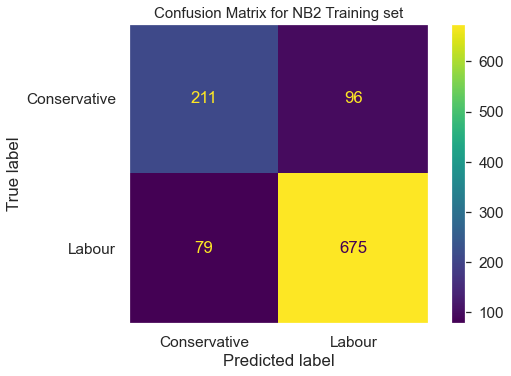

In [161]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(NB2,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for NB2 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



<Figure size 720x432 with 0 Axes>

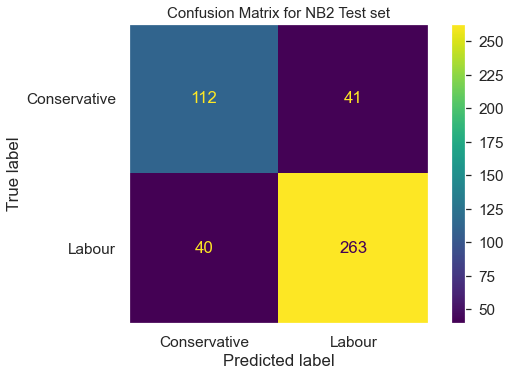

In [162]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(NB2,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for NB2 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

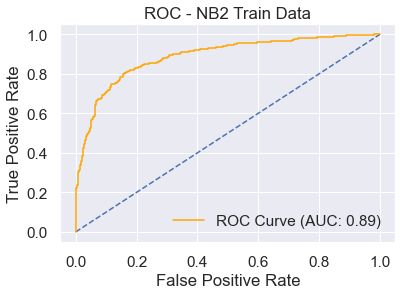

NB2_train_auc 0.8879375145802193


In [163]:
NB2_train_auc3, NB2_train_fpr, NB2_train_tpr = draw_auc_roc(NB2, X_train, y_train, 'orange', 'ROC - NB2 Train Data')
print('NB2_train_auc', NB2_train_auc3)

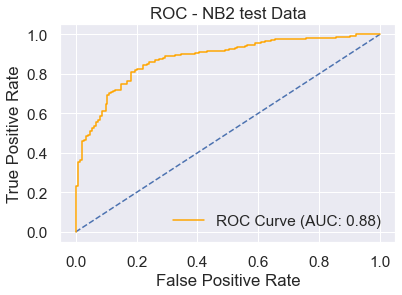

NB2_test_auc 0.8763562630772882


In [164]:
NB2_test_auc3, NB2_test_fpr, NB2_test_tpr = draw_auc_roc(NB2, X_test, y_test, 'orange', 'ROC - NB2 test Data')
print('NB2_test_auc', NB2_test_auc3)

AUC for Training data = 0.8879375145802193
AUC for Test data = 0.8763562630772882


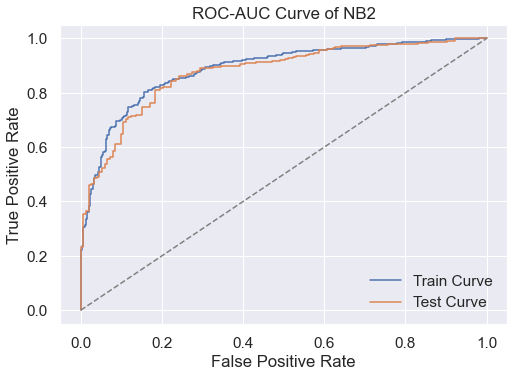

In [165]:
NB_train_predict_prob = NB2.predict_proba(X_train)
NB_test_predict_prob = NB2.predict_proba(X_test)
NB_pred_train_prob = NB2.predict_proba(X_train)
NB_pred_test_prob = NB2.predict_proba(X_test)

NB_auc_train = roc_auc_score(y_train,NB_train_predict_prob[:,1])
NB_auc_test = roc_auc_score(y_test,NB_test_predict_prob[:,1])
print("AUC for Training data =" ,NB_auc_train)
print("AUC for Test data =",NB_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(NB2, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(NB2, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of NB2');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Support Vector Machine with GridsearchCV

In [166]:
class_weight = dict({0:2.3, 1:1})
clf = svm.SVC(probability=True, class_weight = class_weight)
grid_values = {'C': np.logspace(-1,1,20),  
              'kernel': ['linear']#['linear', 'poly', 'rbf', 'sigmoid']
              } 
SVM_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
SVM_model3.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 2.3, 1: 1}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear']})

The SVM algorithm, like gradient boosting, is very popular, very effective, and provides a large number of hyperparameters to tune.

Perhaps the first important parameter is the choice of kernel that will control the manner in which the input variables will be projected. There are many to choose from, but linear, polynomial, and RBF are the most common, perhaps just linear and RBF in practice.

kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.

Another critical parameter is the penalty (C) that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class. A log scale might be a good starting point.

C in [100, 10, 1.0, 0.1, 0.001]

In [167]:
print("Best Parameters from SVM Model",SVM_model3.best_params_)

Best Parameters from SVM Model {'C': 0.1, 'kernel': 'linear'}


In [168]:
ytrain_predict = SVM_model3.predict(X_train)
ytest_predict = SVM_model3.predict(X_test)

In [169]:
SVM_train_met3,SVM_train_accu3,SVM_train_precision3,SVM_train_recall3,SVM_train_f13 = performance_matrices(SVM_model3, X_train, y_train, ytrain_predict)
SVM_train_met_maj3,SVM_train_accu_maj3,SVM_train_precision_maj3,SVM_train_recall_maj3,SVM_train_f1_maj3 = performance_matrices_maj(SVM_model3, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu3)
print ('SVM_train_precision ',SVM_train_precision3)
print ('SVM_train_recall ',SVM_train_recall3)
print ('SVM_train_f1 ',SVM_train_f13)

SVM_train_accu  0.82
SVM_train_precision  0.65
SVM_train_recall  0.82
SVM_train_f1  0.73


In [170]:
SVM_train_met3

precision    recall  f1-score      support
0              0.653646  0.817590  0.726483   307.000000
1              0.917282  0.823607  0.867925   754.000000
accuracy       0.821866  0.821866  0.821866     0.821866
macro avg      0.785464  0.820599  0.797204  1061.000000
weighted avg   0.840999  0.821866  0.826999  1061.000000

In [171]:
SVM_train_met1

precision    recall  f1-score      support
0              0.896552  0.084691  0.154762   307.000000
1              0.727713  0.996021  0.840985   754.000000
accuracy       0.732328  0.732328  0.732328     0.732328
macro avg      0.812132  0.540356  0.497874  1061.000000
weighted avg   0.776567  0.732328  0.642427  1061.000000

In [172]:
SVM_test_met3,SVM_test_accu3,SVM_test_precision3,SVM_test_recall3,SVM_test_f13 = performance_matrices(SVM_model3, X_test, y_test, ytest_predict)
SVM_test_met_maj3,SVM_test_accu_maj3,SVM_test_precision_maj3,SVM_test_recall_maj3,SVM_test_f1_maj3 = performance_matrices_maj(SVM_model3, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu3)
print ('SVM_test_precision ',SVM_test_precision3)
print ('SVM_test_recall ',SVM_test_recall3)
print ('SVM_test_f1 ',SVM_test_f13)

SVM_test_accu  0.8
SVM_test_precision  0.65
SVM_test_recall  0.83
SVM_test_f1  0.73


In [173]:
SVM_test_met3

precision    recall  f1-score     support
0              0.654639  0.830065  0.731988  153.000000
1              0.900763  0.778878  0.835398  303.000000
accuracy       0.796053  0.796053  0.796053    0.796053
macro avg      0.777701  0.804472  0.783693  456.000000
weighted avg   0.818182  0.796053  0.800702  456.000000

In [174]:
SVM_test_met1

precision    recall  f1-score     support
0              0.857143  0.078431  0.143713  153.000000
1              0.680995  0.993399  0.808054  303.000000
accuracy       0.686404  0.686404  0.686404    0.686404
macro avg      0.769069  0.535915  0.475883  456.000000
weighted avg   0.740098  0.686404  0.585150  456.000000

              precision    recall  f1-score   support

           0       0.65      0.82      0.73       307
           1       0.92      0.82      0.87       754

    accuracy                           0.82      1061
   macro avg       0.79      0.82      0.80      1061
weighted avg       0.84      0.82      0.83      1061
 



<Figure size 720x432 with 0 Axes>

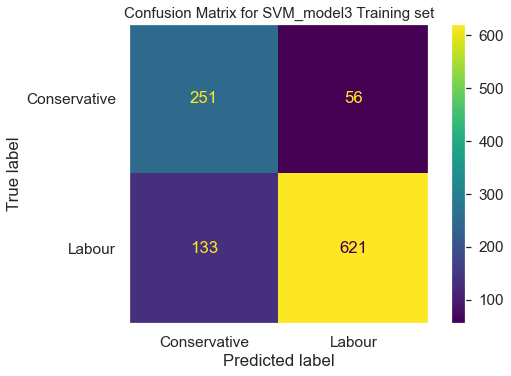

In [175]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for SVM_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       153
           1       0.90      0.78      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.82      0.80      0.80       456
 



<Figure size 720x432 with 0 Axes>

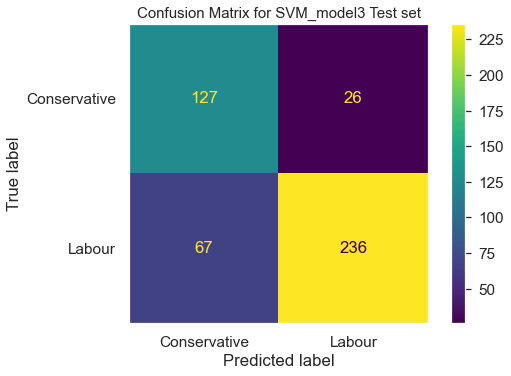

In [176]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for SVM_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

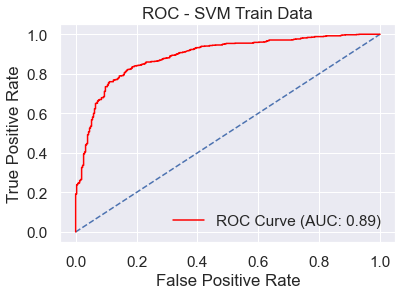

SVM_train_auc 0.8901277875219245


In [177]:
SVM_train_auc3, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model3, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc3)

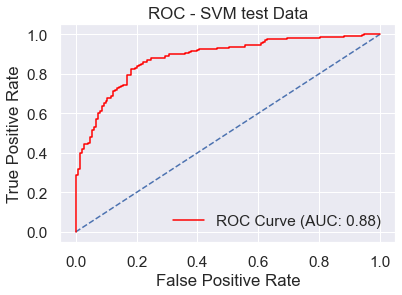

SVM_test_auc 0.881037123320175


In [178]:
SVM_test_auc3, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model3, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc3)

AUC for Training data = 0.8901277875219245
AUC for Test data = 0.881037123320175


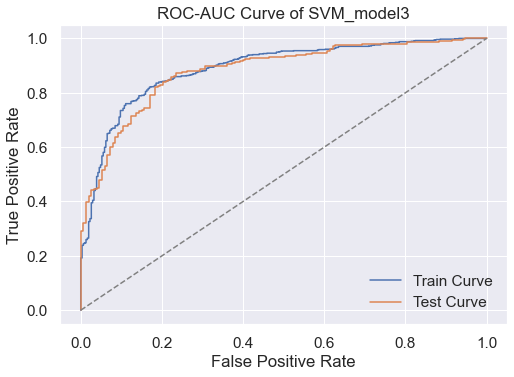

In [179]:
LR_train_predict_prob = SVM_model3.predict_proba(X_train)
LR_test_predict_prob = SVM_model3.predict_proba(X_test)
LR_pred_train_prob = SVM_model3.predict_proba(X_train)
LR_pred_test_prob = SVM_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(SVM_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(SVM_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of SVM_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Bagging using RandomForest

In [180]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

n_estimators
The number of base estimators in the ensemble.

max_samples
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).

If int, then draw max_samples samples.

If float, then draw max_samples * X.shape[0] samples.

In [181]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [182]:
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.91
Bagging_train_precision  0.83
Bagging_train_recall  0.87
Bagging_train_f1  0.85


In [183]:
Bagging_met

precision    recall  f1-score      support
0              0.831776  0.869707  0.850318   307.000000
1              0.945946  0.928382  0.937082   754.000000
accuracy       0.911404  0.911404  0.911404     0.911404
macro avg      0.888861  0.899044  0.893700  1061.000000
weighted avg   0.912911  0.911404  0.911977  1061.000000

In [184]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.83
Bagging_test_precision  0.75
Bagging_test_recall  0.74
Bagging_test_f1  0.75


In [185]:
Bagging_met

precision    recall  f1-score    support
0              0.753333  0.738562  0.745875  153.00000
1              0.869281  0.877888  0.873563  303.00000
accuracy       0.831140  0.831140  0.831140    0.83114
macro avg      0.811307  0.808225  0.809719  456.00000
weighted avg   0.830378  0.831140  0.830720  456.00000

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       307
           1       0.95      0.93      0.94       754

    accuracy                           0.91      1061
   macro avg       0.89      0.90      0.89      1061
weighted avg       0.91      0.91      0.91      1061
 



<Figure size 720x432 with 0 Axes>

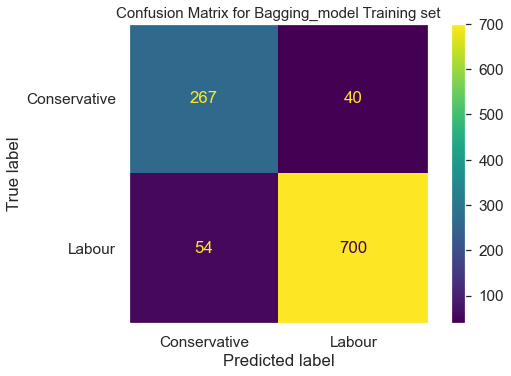

In [186]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for Bagging_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

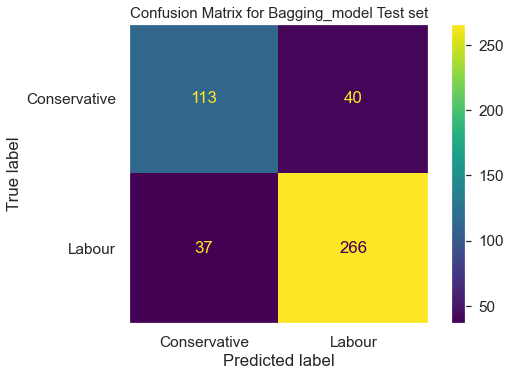

In [187]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for Bagging_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

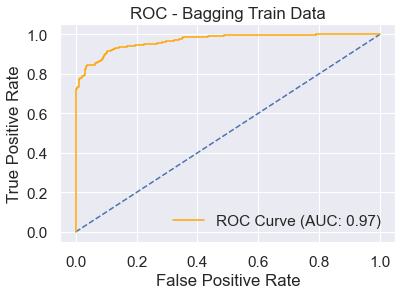

Bagging_train_auc 0.9678111958803861


In [188]:
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

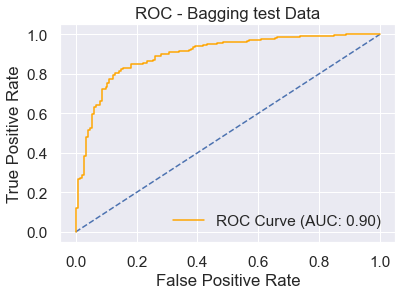

Bagging_test_auc 0.8981211846674864


In [189]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

AUC for Training data = 0.9678111958803861
AUC for Test data = 0.8981211846674864


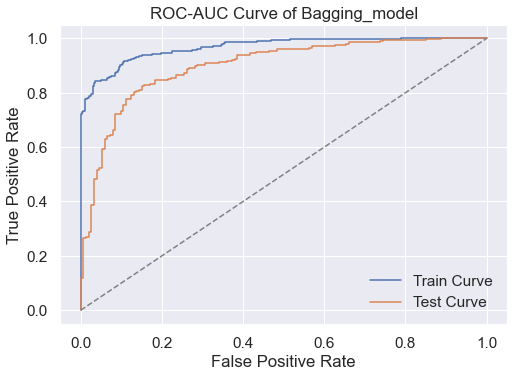

In [190]:
LR_train_predict_prob = Bagging_model.predict_proba(X_train)
LR_test_predict_prob = Bagging_model.predict_proba(X_test)
LR_pred_train_prob = Bagging_model.predict_proba(X_train)
LR_pred_test_prob = Bagging_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of Bagging_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# XGBOOST

In [191]:
!pip install xgboost


In [192]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

max_depth 

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.

range:

min_child_weight 

Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.


The most important parameter for bagged decision trees is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

n_estimators in [10, 100, 1000]


The learning_rate parameter can be set to control the weighting of new trees added to the model.

In [193]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [194]:
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.91
XGB_train_precision  0.86
XGB_train_recall  0.81
XGB_train_f1  0.83


In [195]:
XGB_met

precision    recall  f1-score      support
0              0.861111  0.807818  0.833613   307.000000
1              0.923674  0.946950  0.935167   754.000000
accuracy       0.906692  0.906692  0.906692     0.906692
macro avg      0.892393  0.877384  0.884390  1061.000000
weighted avg   0.905571  0.906692  0.905783  1061.000000

In [196]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.83
XGB_test_precision  0.77
XGB_test_recall  0.69
XGB_test_f1  0.73


In [197]:
XGB_met

precision    recall  f1-score     support
0              0.773723  0.692810  0.731034  153.000000
1              0.852665  0.897690  0.874598  303.000000
accuracy       0.828947  0.828947  0.828947    0.828947
macro avg      0.813194  0.795250  0.802816  456.000000
weighted avg   0.826177  0.828947  0.826429  456.000000

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       307
           1       0.92      0.95      0.94       754

    accuracy                           0.91      1061
   macro avg       0.89      0.88      0.88      1061
weighted avg       0.91      0.91      0.91      1061
 



<Figure size 720x432 with 0 Axes>

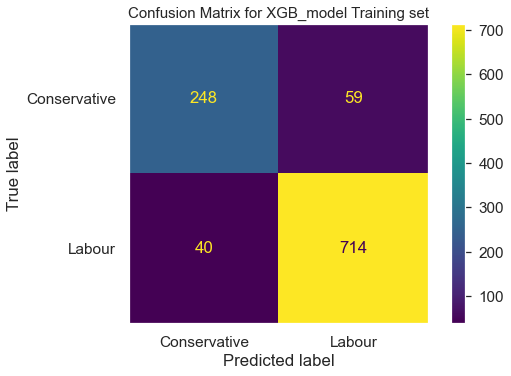

In [198]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for XGB_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

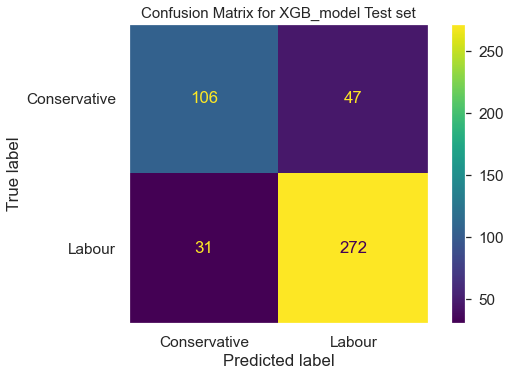

In [199]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for XGB_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

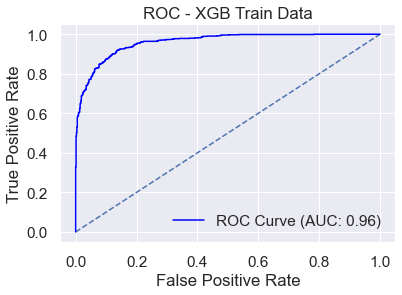

XGB_train_auc 0.9599633079807781


In [200]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

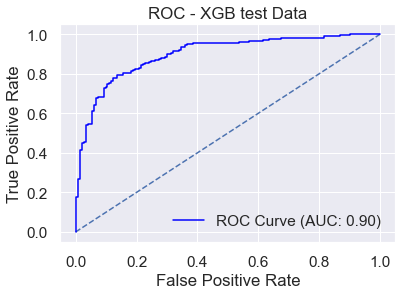

XGB_test_auc 0.8986604542807222


In [201]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

AUC for Training data = 0.9647072291967271
AUC for Test data = 0.8986604542807222


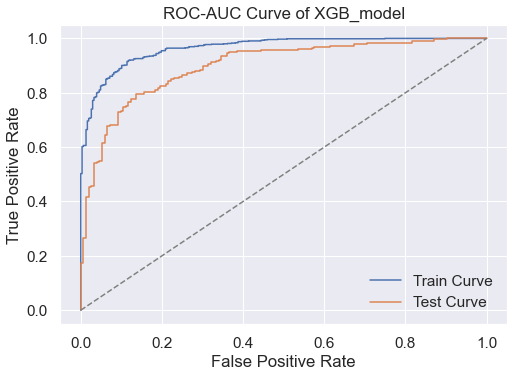

In [202]:
LR_train_predict_prob = XGB_model.predict_proba(X_train)
LR_test_predict_prob = XGB_model.predict_proba(X_test)
LR_pred_train_prob = XGB_model.predict_proba(X_train)
LR_pred_test_prob = XGB_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(XGB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(XGB_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of XGB_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Ada Boost

In [203]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.



In [204]:
ADB_met,ADB_train_accu,ADB_train_precision,ADB_train_recall,ADB_train_f1 = performance_matrices(ADB, X_train, y_train, ytrain_predict)
ADB_met_maj,ADB_train_accu_maj,ADB_train_precision_maj,ADB_train_recall_maj,ADB_train_f1_maj = performance_matrices_maj(ADB, X_train, y_train, ytrain_predict)
print ('ADB_train_accu',ADB_train_accu)
print ('ADB_train_precision',ADB_train_precision)
print ('ADB_train_recall',ADB_train_recall)
print ('ADB_train_f1',ADB_train_f1)

ADB_train_accu 0.85
ADB_train_precision 0.86
ADB_train_recall 0.81
ADB_train_f1 0.83


In [205]:
ADB_met,ADB_test_accu,ADB_test_precision,ADB_test_recall,ADB_test_f1 = performance_matrices(ADB, X_test, y_test, ytest_predict)
ADB_met_maj,ADB_test_accu_maj,ADB_test_precision_maj,ADB_test_recall_maj,ADB_test_f1_maj = performance_matrices_maj(ADB, X_test, y_test, ytest_predict)
print ('ADB_test_accu',ADB_test_accu)
print ('ADB_test_precision',ADB_test_precision)
print ('ADB_test_recall',ADB_test_recall)
print ('ADB_test_f1',ADB_test_f1)

ADB_test_accu 0.81
ADB_test_precision 0.77
ADB_test_recall 0.69
ADB_test_f1 0.73


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       307
           1       0.92      0.95      0.94       754

    accuracy                           0.91      1061
   macro avg       0.89      0.88      0.88      1061
weighted avg       0.91      0.91      0.91      1061
 



<Figure size 720x432 with 0 Axes>

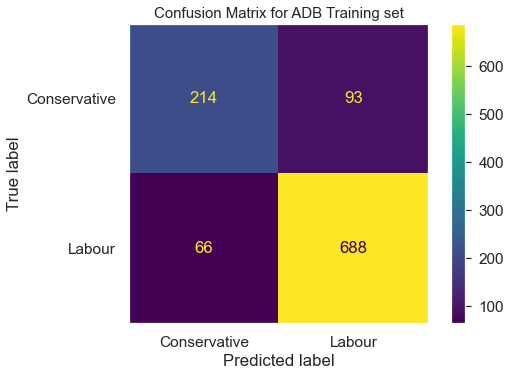

In [206]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(ADB,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for ADB Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

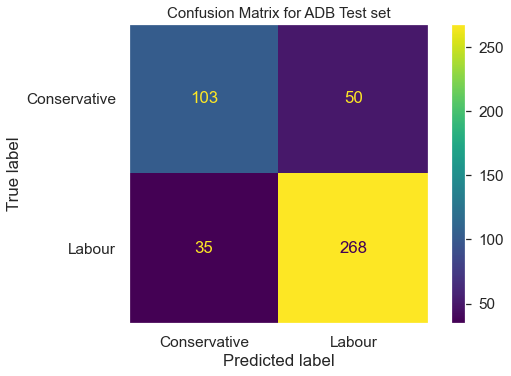

In [207]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(ADB,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for ADB Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

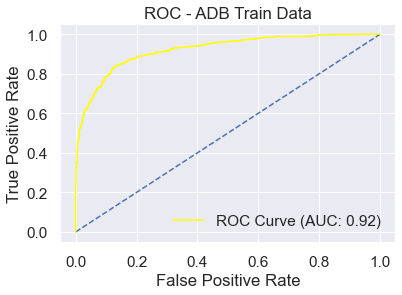

ADB_train_auc 0.9214701081411958


In [208]:
ADB_train_auc, ADB_train_fpr, ADB_train_tpr = draw_auc_roc(ADB, X_train_res, y_train_res, 'yellow', 'ROC - ADB Train Data')
print('ADB_train_auc', ADB_train_auc)

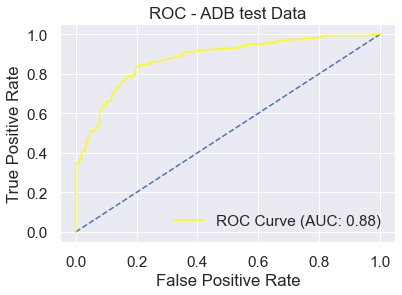

ADB_test_auc 0.8773808753424363


In [209]:
ADB_test_auc, ADB_test_fpr, ADB_test_tpr = draw_auc_roc(ADB, X_test, y_test, 'yellow', 'ROC - ADB test Data')
print('ADB_test_auc', ADB_test_auc)

AUC for Training data = 0.9148061586846267
AUC for Test data = 0.8773808753424363


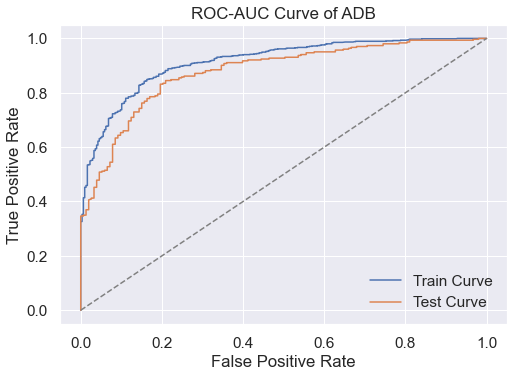

In [210]:
ADB_train_predict_prob = ADB.predict_proba(X_train)
ADB_test_predict_prob = ADB.predict_proba(X_test)
ADB_pred_train_prob = ADB.predict_proba(X_train)
ADB_pred_test_prob = ADB.predict_proba(X_test)

ADB_auc_train = roc_auc_score(y_train,ADB_train_predict_prob[:,1])
ADB_auc_test = roc_auc_score(y_test,ADB_test_predict_prob[:,1])
print("AUC for Training data =" ,ADB_auc_train)
print("AUC for Test data =",ADB_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(ADB, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(ADB, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of ADB');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

# Gradient Boosting Classifier

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

The number of trees in the model (n_estimators)

The depth of each tree (max_depth)

In [212]:
ytrain_predictg = GBC_model.predict(X_train)
ytest_predictg = GBC_model.predict(X_test)

In [213]:
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predictg)
GBC_met_maj,GBC_train_accu_maj,GBC_train_precision_maj,GBC_train_recall_maj,GBC_train_f1_maj = performance_matrices_maj(GBC_model, X_train, y_train, ytrain_predictg)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  1.0
GBC_train_precision  1.0
GBC_train_recall  1.0
GBC_train_f1  1.0


In [214]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predictg)
GBC_met_maj,GBC_test_accu_maj,GBC_test_precision_maj,GBC_test_recall_maj,GBC_test_f1_maj = performance_matrices_maj(GBC_model, X_test, y_test, ytest_predictg)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.82
GBC_test_precision  0.77
GBC_test_recall  0.69
GBC_test_f1  0.72


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       307
           1       0.92      0.95      0.94       754

    accuracy                           0.91      1061
   macro avg       0.89      0.88      0.88      1061
weighted avg       0.91      0.91      0.91      1061
 



<Figure size 720x432 with 0 Axes>

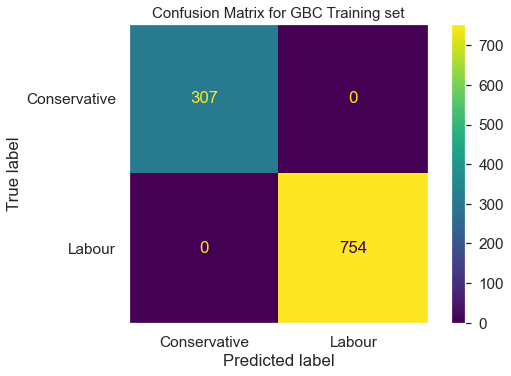

In [215]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(GBC_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for GBC Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

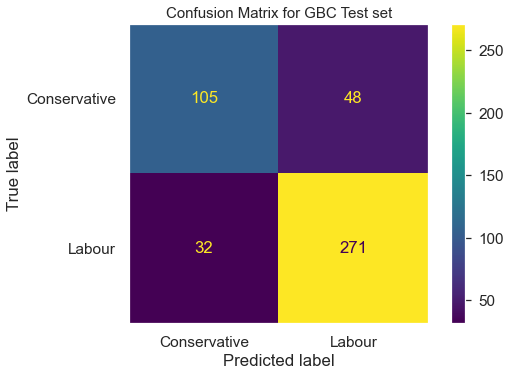

In [216]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(GBC_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for GBC Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

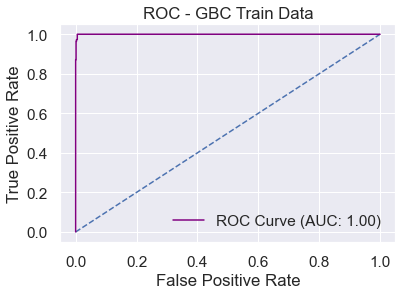

GBC_train_auc 0.9997097707012643


In [217]:
GBC_train_auc, GBC_train_fpr, GBC_train_tpr = draw_auc_roc(GBC_model, X_train_res, y_train_res, 'purple', 'ROC - GBC Train Data')
print('GBC_train_auc', GBC_train_auc)

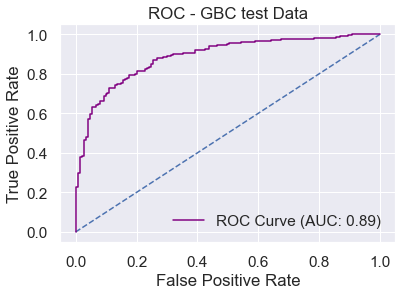

GBC_test_auc 0.8865376733751806


In [218]:
GBC_test_auc, GBC_test_fpr, GBC_test_tpr = draw_auc_roc(GBC_model, X_test, y_test, 'purple', 'ROC - GBC test Data')
print('GBC_test_auc', GBC_test_auc)

AUC for Training data = 1.0
AUC for Test data = 0.8773808753424363


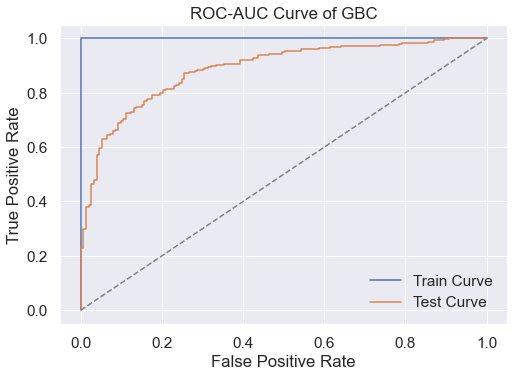

In [219]:
GBC_train_predict_prob = GBC_model.predict_proba(X_train)
GBC_test_predict_prob = GBC_model.predict_proba(X_test)
GBC_pred_train_prob = GBC_model.predict_proba(X_train)
GBC_pred_test_prob = GBC_model.predict_proba(X_test)

GBC_auc_train = roc_auc_score(y_train,GBC_train_predict_prob[:,1])
GBC_auc_test = roc_auc_score(y_test,ADB_test_predict_prob[:,1])
print("AUC for Training data =" ,GBC_auc_train)
print("AUC for Test data =",GBC_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(GBC_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(GBC_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of GBC');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model
Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)
Final Model Comparison

In [220]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc3,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'NB2 Train':[NB2_train_accu3,NB2_train_auc3,NB2_train_recall3,NB2_train_recall_maj3,NB2_train_precision3,NB2_train_precision_maj3,NB2_train_f13,NB2_train_f1_maj3],
                     'SVM Train':[SVM_train_accu3,SVM_train_auc3,SVM_train_recall3,SVM_train_recall_maj3,SVM_train_precision3,SVM_train_precision_maj3,SVM_train_f13,SVM_train_f1_maj3],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     'ADB Train':[ADB_train_accu,ADB_train_auc,ADB_train_recall,ADB_train_recall_maj,ADB_train_precision,ADB_train_precision_maj,ADB_train_f1,ADB_train_f1_maj],
                     'GBC Train':[GBC_train_accu,GBC_train_auc,GBC_train_recall,GBC_train_recall_maj,GBC_train_precision,GBC_train_precision_maj,GBC_train_f1,GBC_train_f1_maj]         
                               },index=index)
round(train_perf_data,2)

Logit Train  LDA Train  KNN Train  NB2 Train  SVM Train  \
Accuracy            0.83       0.83       0.85       0.84       0.82   
AUC                 0.89       0.89       0.91       0.89       0.89   
Recall-0            0.79       0.65       0.77       0.69       0.82   
Recall-1            0.85       0.91       0.88       0.90       0.82   
Precision-0         0.68       0.74       0.73       0.73       0.65   
Precision-1         0.91       0.86       0.90       0.88       0.92   
F1 Score-0          0.73       0.69       0.75       0.71       0.73   
F1 Score-1          0.88       0.89       0.89       0.89       0.87   

             Bagging Train  XGB Train  ADB Train  GBC Train  
Accuracy              0.91       0.91       0.85        1.0  
AUC                   0.97       0.96       0.92        1.0  
Recall-0              0.87       0.81       0.81        1.0  
Recall-1              0.93       0.95       0.95        1.0  
Precision-0           0.83       0.86       0.86        1.0  
Precision-1           0.95       0.92       0.92        1.0  
F1 Score-0            0.85       0.83       0.83        1.0  
F1 Score-1            0.94       0.94       0.94        1.0

In [221]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc3,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'NB2 Test':[NB2_test_accu3,NB2_test_auc3,NB2_test_recall3,NB2_test_recall_maj3,NB2_test_precision3,NB2_test_precision_maj3,NB2_test_f13,NB2_test_f1_maj3],
                     'SVM Test':[SVM_test_accu3,SVM_test_auc3,SVM_test_recall3,SVM_test_recall_maj3,SVM_test_precision3,SVM_test_precision_maj3,SVM_test_f13,SVM_test_f1_maj3],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj],
                     'ADB Test':[ADB_test_accu,ADB_test_auc,ADB_test_recall,ADB_test_recall_maj,ADB_test_precision,ADB_test_precision_maj,ADB_test_f1,ADB_test_f1_maj],     
                     'GBC Test':[GBC_test_accu,GBC_test_auc,GBC_test_recall,GBC_test_recall_maj,GBC_test_precision,GBC_test_precision_maj,GBC_test_f1,GBC_test_f1_maj]        
                              },index=index)
round(test_perf_data,2)

Logit Test  LDA Test  KNN Test  NB2 Test  SVM Test  Bagging Test  \
Accuracy           0.82      0.83      0.82      0.82      0.80          0.83   
AUC                0.88      0.89      0.88      0.88      0.88          0.90   
Recall-0           0.81      0.73      0.72      0.73      0.83          0.74   
Recall-1           0.82      0.89      0.87      0.87      0.78          0.88   
Precision-0        0.70      0.77      0.73      0.74      0.65          0.75   
Precision-1        0.90      0.86      0.86      0.87      0.90          0.87   
F1 Score-0         0.75      0.74      0.73      0.73      0.73          0.75   
F1 Score-1         0.86      0.88      0.86      0.87      0.84          0.87   

             XGB Test  ADB Test  GBC Test  
Accuracy         0.83      0.81      0.82  
AUC              0.90      0.88      0.89  
Recall-0         0.69      0.69      0.69  
Recall-1         0.90      0.90      0.89  
Precision-0      0.77      0.77      0.77  
Precision-1      0.85      0.85      0.85  
F1 Score-0       0.73      0.73      0.72  
F1 Score-1       0.87      0.87      0.87

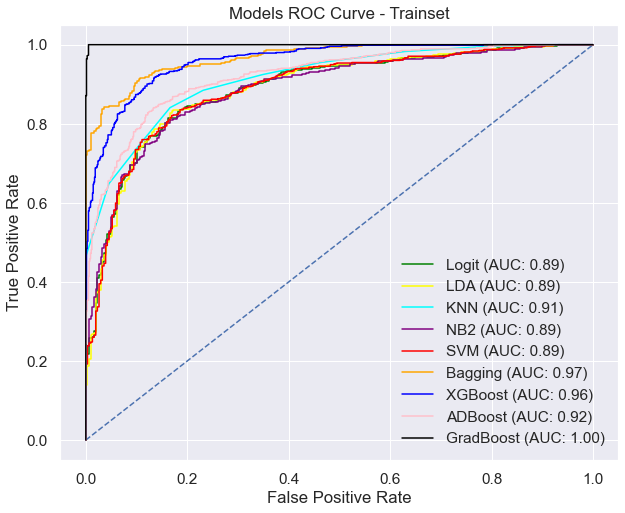

In [222]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc3)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(NB2_train_fpr,NB2_train_tpr,color='purple',label='NB2 (AUC: %0.2f)'%NB2_train_auc3)
plt.plot(SVM_train_fpr,SVM_train_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_train_auc3)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.plot(ADB_train_fpr,ADB_train_tpr,color='pink',label='ADBoost (AUC: %0.2f)'%ADB_train_auc)
plt.plot(GBC_train_fpr,GBC_train_tpr,color='black',label='GradBoost (AUC: %0.2f)'%GBC_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Trainset')
plt.legend(loc="lower right")

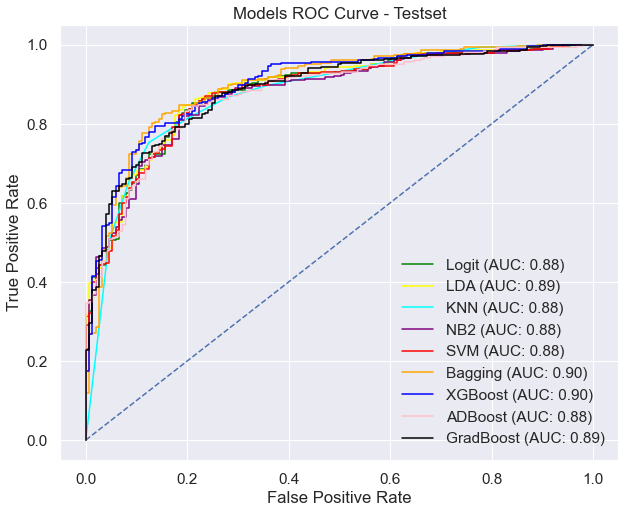

In [223]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc3)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(NB2_test_fpr,NB2_test_tpr,color='purple',label='NB2 (AUC: %0.2f)'%NB2_test_auc3)
plt.plot(SVM_test_fpr,SVM_test_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_test_auc3)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.plot(ADB_test_fpr,ADB_test_tpr,color='pink',label='ADBoost (AUC: %0.2f)'%ADB_test_auc)
plt.plot(GBC_test_fpr,GBC_test_tpr,color='black',label='GradBoost (AUC: %0.2f)'%GBC_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Testset')
plt.legend(loc="lower right");

In terms of model selection i will be choosing bagging as my go to model because of the accuracy value and the vale of recall these both value have a blanced kind of thing between them also the accuracy is the most high in this model as we need accuray in our selection process so we can know the definitive answer. as bagging model recall score helps us to know that what amount of votes are really going to the supposed party that we are finding about XGB model is also good but in comparison of both accuracy and recall score XGB model is performing quite less in camparision of bagging model. As we can saw that by the recall score of the bagging model that most of the prediction done by bagging is reliable then the others. So thats why as our bagging model is giving us most amount of correct predictions and by studying the models and confusion matrix most amount of vote or voters are favouring tha labour class or party. So, by this we have properly predicted that which party is going to win as most of the other models are also favourig the labour class only so you can also get a idea of the winning party.
 

# 1.8 Based on these predictions, what are the insights? 

Here, by studying the model we came to know that most the population is opting for labour class. So, we can say that labour class is going to win on the basis of the prediction done by our models, as most of the voters or votes are from labour class only, as we not have enought information about the work of labour class and conservation class i may not be able to tell the suggestion of how the respected class must improve. From my prediction, labour class is almost covering 70-85% of the seats. Also the proportion of voters or votes from conservative party is not much, that is one reason that they arent able to win or acquire seats for themselves my suggest would to add the numbers to their party. we can see that labour party have overwhelming strenght in terms of votes or voters that is the reason they are going to win as per prediction done by our model because most of the votes are going to the labour class.

## Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [224]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [225]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [226]:
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.
#### Number of words

In [228]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  
1941-Roosevelt  On each national day of inauguration since 178...        1323  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769

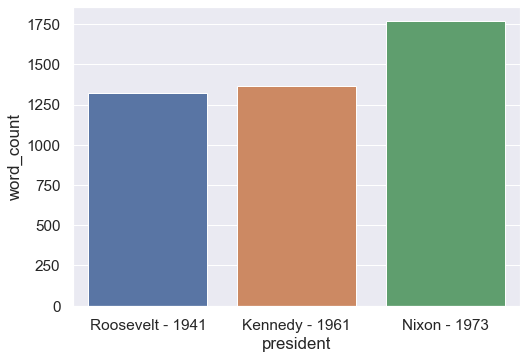

In [229]:
sns.barplot(data = inaugural_speech, x = 'president', y = 'word_count', orient = 'v');

#### Number of characters

In [231]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  
1941-Roosevelt        7571  
1961-Kennedy          7618  
1973-Nixon            9991

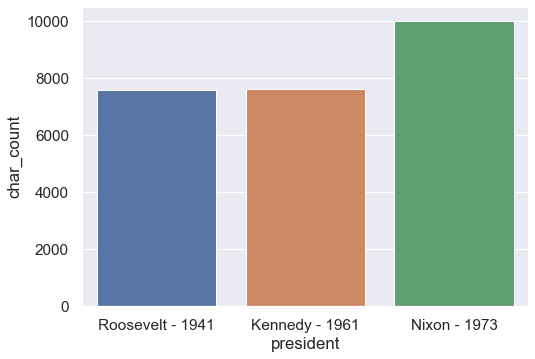

In [232]:
sns.barplot(data = inaugural_speech, x = 'president', y = 'char_count', orient = 'v');

#### Number of sentences

In [234]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

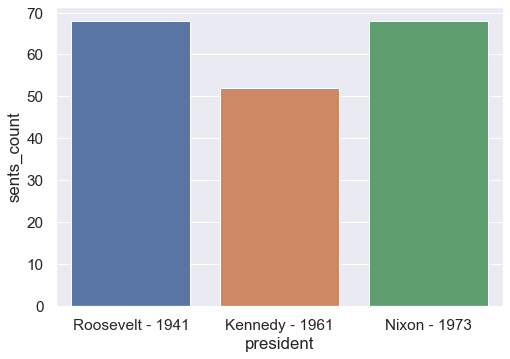

In [235]:
sns.barplot(data = inaugural_speech, x = 'president', y = 'sents_count', orient = 'v');

## 2.2 Remove all the stopwords from all three speeches.

In [237]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [238]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [239]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [240]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...        1323   
1961-Kennedy    vice president johnson speaker chief justice p...        1364   
1973-Nixon      vice president speaker chief justice senator c...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [241]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [242]:
print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

Speech of president Kennedy without stopwords


['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [243]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

Speech of president Nixon without stopwords


['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [245]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

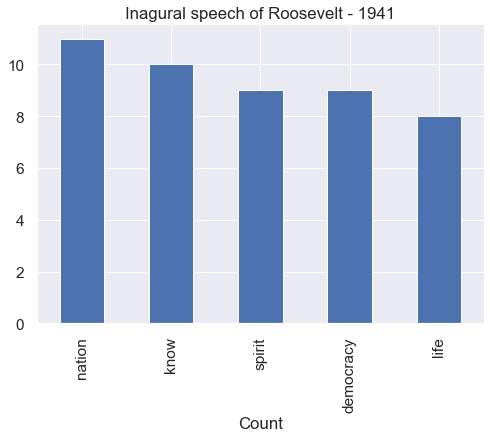

In [246]:
freq.plot(kind='bar')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count');

In [247]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

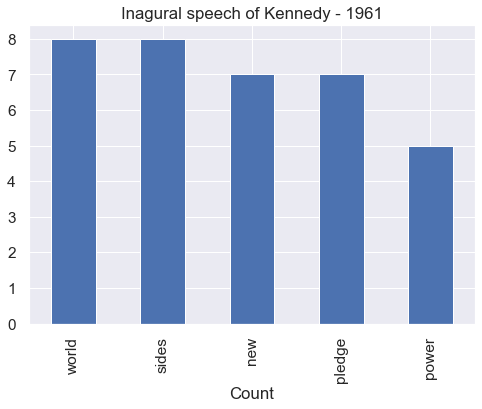

In [248]:
freq.plot(kind='bar')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count');

In [249]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

Text(0.5, 0, 'Count')

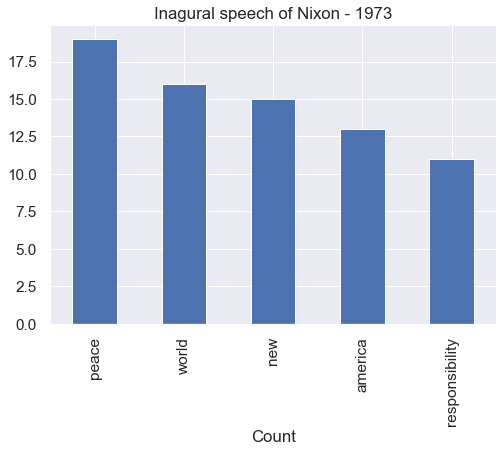

In [250]:
ax = freq.plot(kind='bar')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

Word Cloud for Roosewelt after cleaning


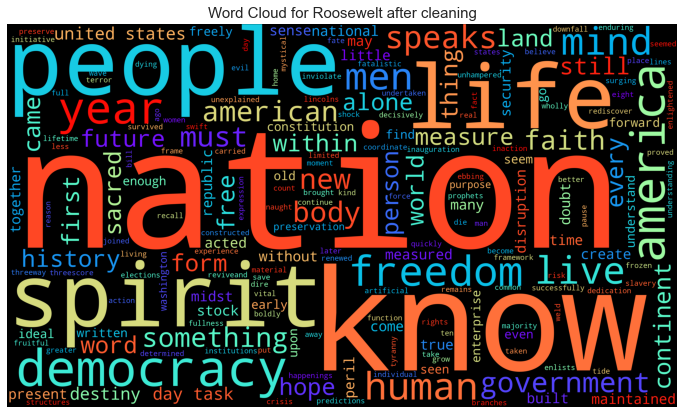

In [252]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


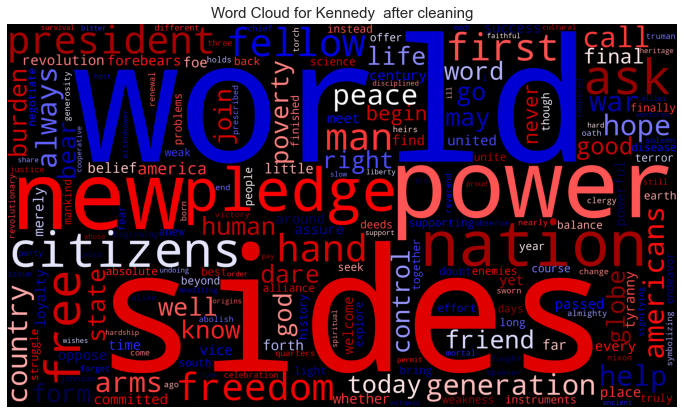

In [253]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


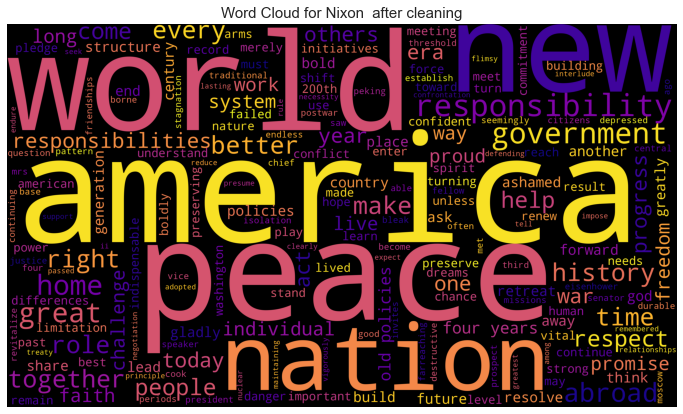

In [254]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()